# Predictive Approach of Fairness in Loan Approval

<div class="alert alert-info"><font color='black'>
Banks have increasingly adopted algorithmic models to make data-driven decisions, such as internal loan approvals. However, these models may introduce predictive analysis biases, potentially increasing credit risk exposure. This project will explore algorithmic discrimination in loan approval models using fairness metrics and predict future credit risk exposures arising from this bias, particularly focusing on personal attributes like age, employment status, or the number of dependents.</font>

**Dataset** - https://www.kaggle.com/datasets/matthew2001/bank-loan-data/

**Group - <font color='black'>Ramandeep Singh Dehal and Mehak Sharma</font>**
</div>

<div class="alert alert-danger"><font color='black'><h4>Problem Statement:</h4><br> To analyze algorithmic discrimination in loan approval models using fairness metrics and predict future credit risk exposures that may arise from identified biasness.</font></div>

<div class="alert alert-danger"><font color='black'><h4>Problem Objectives:</h4></br>
&#10148;To download and preprocess existing loan approval dataset with different personal attributes like age, employment status or the number of household dependents.</br>
&#10148;To identify and select the most relevant dataset features that influence loan approval decisions.</br>
&#10148;To develop and train various machine learning models (Logistic Regression, Decision Tree and KNN Classification) to predict various loan approval biasness outcomes.</br>
&#10148;To evaluate the performance of the select models using approapriate metrics such as accuracy, recall, precision, F1 Score and ROC-AUC.</br>
&#10148;To optimize the selected model by fine-tuning hyperparameters to ensure model robustness and reliability.</br>
&#10148;To test the predictive model into the loan approval process, thus predict result with best performant model.</font></div>

<div class="alert alert-danger"><font color='black'><h4>Research Questions: </h4></br>
&#10148;Are there inequalities or biasness in the loan approval process?</br>
&#10148;What variable may lead to a significant biased loan approval process?</br>
&#10148;What fairness interventions that may be deployed to identify the probable biasness in the loan approval process?</br>
&#10148;Which predictive analysis model will provide the best insights in addressing the loan approval process biasness?</font></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('dataset/borrower_table.csv')
df2 = pd.read_csv('dataset/loan_table.csv')

In [3]:
df1.head()

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          NaN   
1   482590              0                          1.0   
2   135565              1                          NaN   
3   207797              0                          1.0   
4   828078              0                          0.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             NaN                     8000   
1                             0.0                     4500   
2                             NaN                     6900   
3                             0.0                     1200   
4                             0.0                     6900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   

   checking_amount  is_employed  yearly_salary  age  dependent_number  
0             1073            0              0   47                 3  
1             5299            1          13500   33                 1  
2             3422            1          24500   38                 8  
3             3388            0              0   24                 1  
4             4282            1          18100   36                 1

In [4]:
df2.head()

loan_id loan_purpose        date  loan_granted  loan_repaid
0    19454   investment  2012-03-15             0          NaN
1   496811   investment  2012-01-17             0          NaN
2   929493        other  2012-02-09             0          NaN
3   580653        other  2012-06-27             1          1.0
4   172419     business  2012-05-21             1          0.0

<div class="alert alert-warning"><center><h1>Data Understanding</h1></center></div>

In [5]:
# Merging datasets
merged_df = pd.merge(df1, df2, on='loan_id', how='inner')

In [6]:
#merged_df.to_csv('dataset/merged_dataset.csv', index=False)

In [7]:
merged_df = pd.read_csv('dataset/merged_dataset.csv')

In [8]:
merged_df

loan_id  is_first_loan  fully_repaid_previous_loans  \
0        289774              1                          NaN   
1        482590              0                          1.0   
2        135565              1                          NaN   
3        207797              0                          1.0   
4        828078              0                          0.0   
...         ...            ...                          ...   
101095    38238              1                          NaN   
101096   590712              1                          NaN   
101097   961276              1                          NaN   
101098   551027              0                          1.0   
101099   761999              1                          NaN   

        currently_repaying_other_loans  total_credit_card_limit  \
0                                  NaN                     8000   
1                                  0.0                     4500   
2                                  NaN                     6900   
3                                  0.0                     1200   
4                                  0.0                     6900   
...                                ...                      ...   
101095                             NaN                     2200   
101096                             NaN                     3800   
101097                             NaN                     1600   
101098                             0.0                     7000   
101099                             NaN                     2300   

        avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                                  0.49           3285   
1                                                  1.03            636   
2                                                  0.82           2085   
3                                                  0.82            358   
4                                                  0.80           2138   
...                                                 ...            ...   
101095                                             0.83           1295   
101096                                             0.70            340   
101097                                             1.06            445   
101098                                             0.82            354   
101099                                             0.47           2999   

        checking_amount  is_employed  yearly_salary  age  dependent_number  \
0                  1073            0              0   47                 3   
1                  5299            1          13500   33                 1   
2                  3422            1          24500   38                 8   
3                  3388            0              0   24                 1   
4                  4282            1          18100   36                 1   
...                 ...          ...            ...  ...               ...   
101095             2240            0              0   47                 2   
101096             3802            1          36100   41                 7   
101097             1757            1          40800   71                 3   
101098             1435            1          41900   44                 2   
101099             4420            1          44200   36                 7   

           loan_purpose        date  loan_granted  loan_repaid  
0              business  2012-01-31             0          NaN  
1            investment  2012-11-02             0          NaN  
2                 other  2012-07-16             1          1.0  
3            investment  2012-06-05             0          NaN  
4       emergency_funds  2012-11-28             0          NaN  
...                 ...         ...           ...          ...  
101095            other  2012-12-24             0          NaN  
101096         business  2012-05-17             1          1.0  
101097            other  2012-09-07

In [9]:
merged_df.shape

(101100, 16)

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   loan_id                                          101100 non-null  int64  
 1   is_first_loan                                    101100 non-null  int64  
 2   fully_repaid_previous_loans                      46153 non-null   float64
 3   currently_repaying_other_loans                   46153 non-null   float64
 4   total_credit_card_limit                          101100 non-null  int64  
 5   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64
 6   saving_amount                                    101100 non-null  int64  
 7   checking_amount                                  101100 non-null  int64  
 8   is_employed                                      101100 non-null  int64  
 9   yearly_salary  

In [11]:
merged_df.head()

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          NaN   
1   482590              0                          1.0   
2   135565              1                          NaN   
3   207797              0                          1.0   
4   828078              0                          0.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             NaN                     8000   
1                             0.0                     4500   
2                             NaN                     6900   
3                             0.0                     1200   
4                             0.0                     6900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   

   checking_amount  is_employed  yearly_salary  age  dependent_number  \
0             1073            0              0   47                 3   
1             5299            1          13500   33                 1   
2             3422            1          24500   38                 8   
3             3388            0              0   24                 1   
4             4282            1          18100   36                 1   

      loan_purpose        date  loan_granted  loan_repaid  
0         business  2012-01-31             0          NaN  
1       investment  2012-11-02             0          NaN  
2            other  2012-07-16             1          1.0  
3       investment  2012-06-05             0          NaN  
4  emergency_funds  2012-11-28             0          NaN

In [12]:
list(merged_df)

['loan_id',
 'is_first_loan',
 'fully_repaid_previous_loans',
 'currently_repaying_other_loans',
 'total_credit_card_limit',
 'avg_percentage_credit_card_limit_used_last_year',
 'saving_amount',
 'checking_amount',
 'is_employed',
 'yearly_salary',
 'age',
 'dependent_number',
 'loan_purpose',
 'date',
 'loan_granted',
 'loan_repaid']

<div class="alert alert-warning">Datatypes</div>

In [13]:
merged_df.dtypes

loan_id                                              int64
is_first_loan                                        int64
fully_repaid_previous_loans                        float64
currently_repaying_other_loans                     float64
total_credit_card_limit                              int64
avg_percentage_credit_card_limit_used_last_year    float64
saving_amount                                        int64
checking_amount                                      int64
is_employed                                          int64
yearly_salary                                        int64
age                                                  int64
dependent_number                                     int64
loan_purpose                                        object
date                                                object
loan_granted                                         int64
loan_repaid                                        float64
dtype: object

<div class="alert alert-info">13 numerical columns 

1 categorical columns 

Target variable: loan_granted  

Number of records: 101,100</div>

<div class="alert alert-warning"><center><h1>Exploratory Data Analysis</h1></center></div>

<div class="alert alert-warning">Data Visualizations for the EDA</div>

In [14]:
stacked_data = merged_df.groupby(['loan_purpose', 'is_employed']).size().unstack(fill_value=0)
 
# Plot the stacked bar chart
ax = stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['#e68133', '#519e3e']
)
 
plt.title('Employment Status Distribution by Loan Purpose (Stacked)')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Employed', labels=['No (0)', 'Yes (1)'])
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=10)
plt.tight_layout()
plt.show()

<div class="alert alert-success">Grouped Bar Chart: Employment distribution by loan purpose.</div>

<div class="alert alert-success">Observation: The employment status as a determinant of the loan purpose is highest in the home loan borrowers, followed by business, investment, emergency funds, and other loan purposes in that order. </br>
This is because employed applicants have low credit risk rating due to their almost guaranteed repayment assurance through payroll deductions.</div>

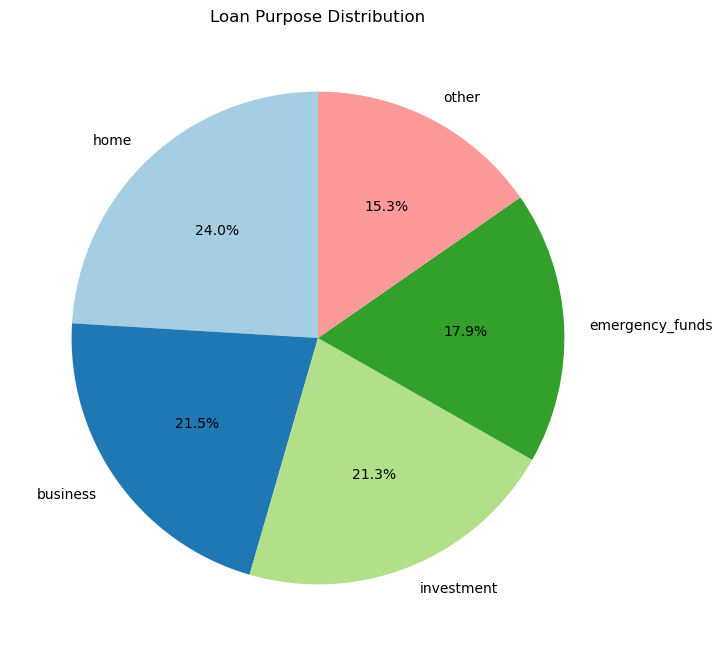

In [15]:
# Count the occurrences of each loan purpose
loan_purpose_counts = merged_df['loan_purpose'].value_counts()

plt.figure(figsize=(8, 8))
loan_purpose_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Loan Purpose Distribution')
plt.ylabel('')
plt.show()

<div class="alert alert-success">Pie Chart: Loan purpose distribution.</div>

<div class = "alert alert-success"> Observation: Based on the above analysis inference is derived that loan purpose distribution as a determinant for loan approval, ranked in an descending order is business, investment,home, emergency funds and other loan purposes in that order.</div>

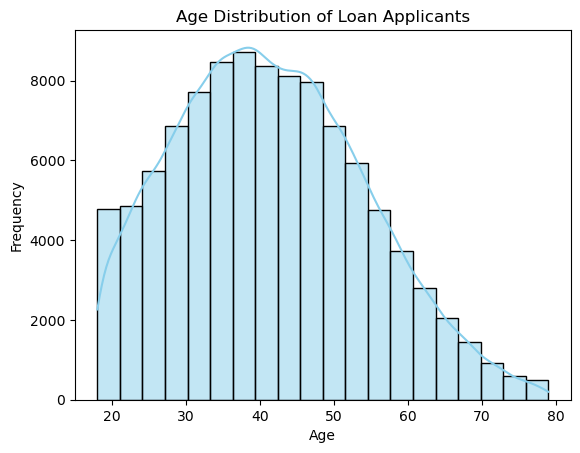

In [17]:
sns.histplot(data=merged_df, x='age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Loan Applicants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-success">Histogram and Density Plot: Age distribution.</div>

<div class = "alert alert-success">Observation: It is evident that majority of the loan applicants fall between the age bracket of 30 and 40 years. </br>
This observation can be attributed to the fact that this age bracket is mostly employed and are establishing their future family lives, thus the need to borrow loans.</div>

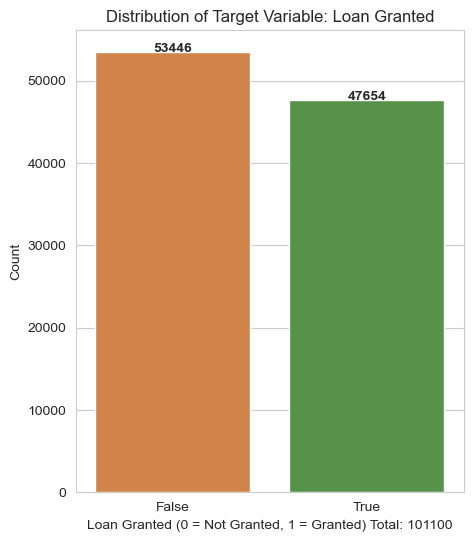

In [171]:
plt.figure(figsize=(5, 6))

# Create the countplot
ax = sns.countplot(data=merged_df, x='loan_granted', palette=['#e68133', '#519e3e'])
plt.title('Distribution of Target Variable: Loan Granted')
plt.ylabel('Count')
total = 0
for p in ax.patches:
    total = total + int(height)
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            f'{int(height)}', ha="center", fontsize=10, weight='bold')
plt.xlabel(f'Loan Granted (0 = Not Granted, 1 = Granted) Total: {total}')
plt.show()


<div class="alert alert-success">Observation: Bar plot for the target variable 'loan_granted', the distribution shows slightly more loans not granted (53,446) than granted (47,654), indicating a somewhat balanced dataset.
</div>

<div class="alert alert-warning">Summary Statistics</div>

In [19]:
merged_df.describe()

loan_id  is_first_loan  fully_repaid_previous_loans  \
count  101100.000000  101100.000000                 46153.000000   
mean   499666.826726       0.543492                     0.899291   
std    288662.006929       0.498107                     0.300946   
min        30.000000       0.000000                     0.000000   
25%    250333.750000       0.000000                     1.000000   
50%    499885.000000       1.000000                     1.000000   
75%    749706.250000       1.000000                     1.000000   
max    999987.000000       1.000000                     1.000000   

       currently_repaying_other_loans  total_credit_card_limit  \
count                    46153.000000            101100.000000   
mean                         0.364332              4112.743818   
std                          0.481247              2129.121462   
min                          0.000000                 0.000000   
25%                          0.000000              2700.000000   
50%                          0.000000              4100.000000   
75%                          1.000000              5500.000000   
max                          1.000000             13500.000000   

       avg_percentage_credit_card_limit_used_last_year  saving_amount  \
count                                     94128.000000  101100.000000   
mean                                          0.724140    1799.617616   
std                                           0.186483    1400.545141   
min                                           0.000000       0.000000   
25%                                           0.600000     834.000000   
50%                                           0.730000    1339.000000   
75%                                           0.860000    2409.000000   
max                                           1.090000   10641.000000   

       checking_amount    is_employed  yearly_salary            age  \
count    101100.000000  101100.000000  101100.000000  101100.000000   
mean       3177.150821       0.658675   21020.727992      41.491632   
std        2044.448155       0.474157   18937.581415      12.825570   
min           0.000000       0.000000       0.000000      18.000000   
25%        1706.000000       0.000000       0.000000      32.000000   
50%        2673.000000       1.000000   21500.000000      41.000000   
75%        4241.000000       1.000000   35300.000000      50.000000   
max       13906.000000       1.000000   97200.000000      79.000000   

       dependent_number   loan_granted   loan_repaid  
count     101100.000000  101100.000000  47654.000000  
mean           3.864748       0.471355      0.644353  
std            2.635491       0.499181      0.478714  
min            0.000000       0.000000      0.000000  
25%            2.000000       0.000000      0.000000  
50%            3.000000       0.000000      1.000000  
75%            6.000000       1.000000      1.000000  
max            8.000000       1.000000      1.000000

<div class="alert alert-success">
    <h2>Observations for the Summary statistics:</h2><br>
- First-Time Borrowers: 54% are first-time borrowers, indicating a mix of experience.<br>
- Current Loans: 36% are currently repaying other loans.<br>
- Repayment History: 90% have fully repaid previous loans, suggesting reliability.<br>
- Credit Limit: Average limit is 4,112, ranging up to 13,500.<br>
- Credit Usage: Average usage is 72.4%, with some exceeding limits.<br>
- Employment: 66% are employed, suggesting employment is significant for approval.<br>
- Salary: High variability, averaging 21,020, ranging from 0 to 97,200.<br>
- Loan Approval: 47% were granted loans, indicating balanced outcomes.<br>
- Repayment Rate: 64% of granted loans were repaid, indicating reliability. </div>

<div class="alert alert-warning"><center><h1>Data Cleaning</h1></center></div>

<div class="alert alert-warning">Check for Null Values </div>

In [20]:
merged_df.isnull().sum()

loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        53446
dtype: int64

<div class="alert alert-warning">Check for Duplicates </div>
 

In [21]:
merged_df['loan_id'].drop_duplicates()

0         289774
1         482590
2         135565
3         207797
4         828078
           ...  
101095     38238
101096    590712
101097    961276
101098    551027
101099    761999
Name: loan_id, Length: 101100, dtype: int64

In [22]:
merged_df['loan_id'].is_unique

True

<div class="alert alert-warning">Dropped Irrelevant columns</div>
 

In [23]:
merged_df.drop(['loan_id'], axis=1, inplace=True)

In [24]:
merged_df.drop(['loan_repaid'], axis=1, inplace=True)

<div class="alert alert-warning"><center><h1>Correlation</h1></center></div>
 

<div class="alert alert-warning">Pearson correlation coefficient</div>



In [25]:
# Calculate Pearson correlation coefficient for the numerical columns
correlation_matrix = merged_df.select_dtypes(include=['number']).corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)

                                                 is_first_loan  \
is_first_loan                                         1.000000   
fully_repaid_previous_loans                                NaN   
currently_repaying_other_loans                             NaN   
total_credit_card_limit                               0.000679   
avg_percentage_credit_card_limit_used_last_year      -0.000781   
saving_amount                                         0.005650   
checking_amount                                       0.005114   
is_employed                                          -0.000971   
yearly_salary                                        -0.001674   
age                                                  -0.002353   
dependent_number                                      0.000887   
loan_granted                                         -0.004398   

                                                 fully_repaid_previous_loans  \
is_first_loan                                                

<div class="alert alert-warning">Target Variable vs Variables Correlation. </div>

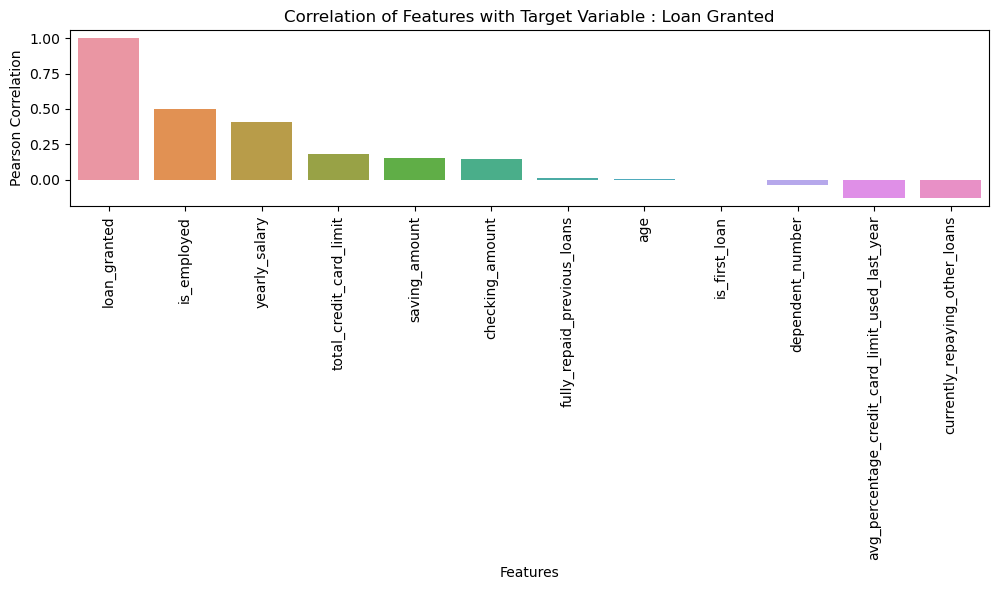

In [26]:
# Extract the correlation of each feature with 'loan_granted'
correlation_with_target = correlation_matrix['loan_granted'].sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)

# Add labels and title to the plot
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title('Correlation of Features with Target Variable : Loan Granted')
plt.ylabel('Pearson Correlation')
plt.xlabel('Features')

# Show the plot
plt.tight_layout()
plt.show()


<div class="alert alert-success">This bar plot displays the Pearson correlation between various features and the target variable "loan_granted," highlighting "is_employed" and "yearly_salary" as relatively stronger correlates compared to other features.</div>


 <div class="alert alert-warning">Correlation Heatmap </div>

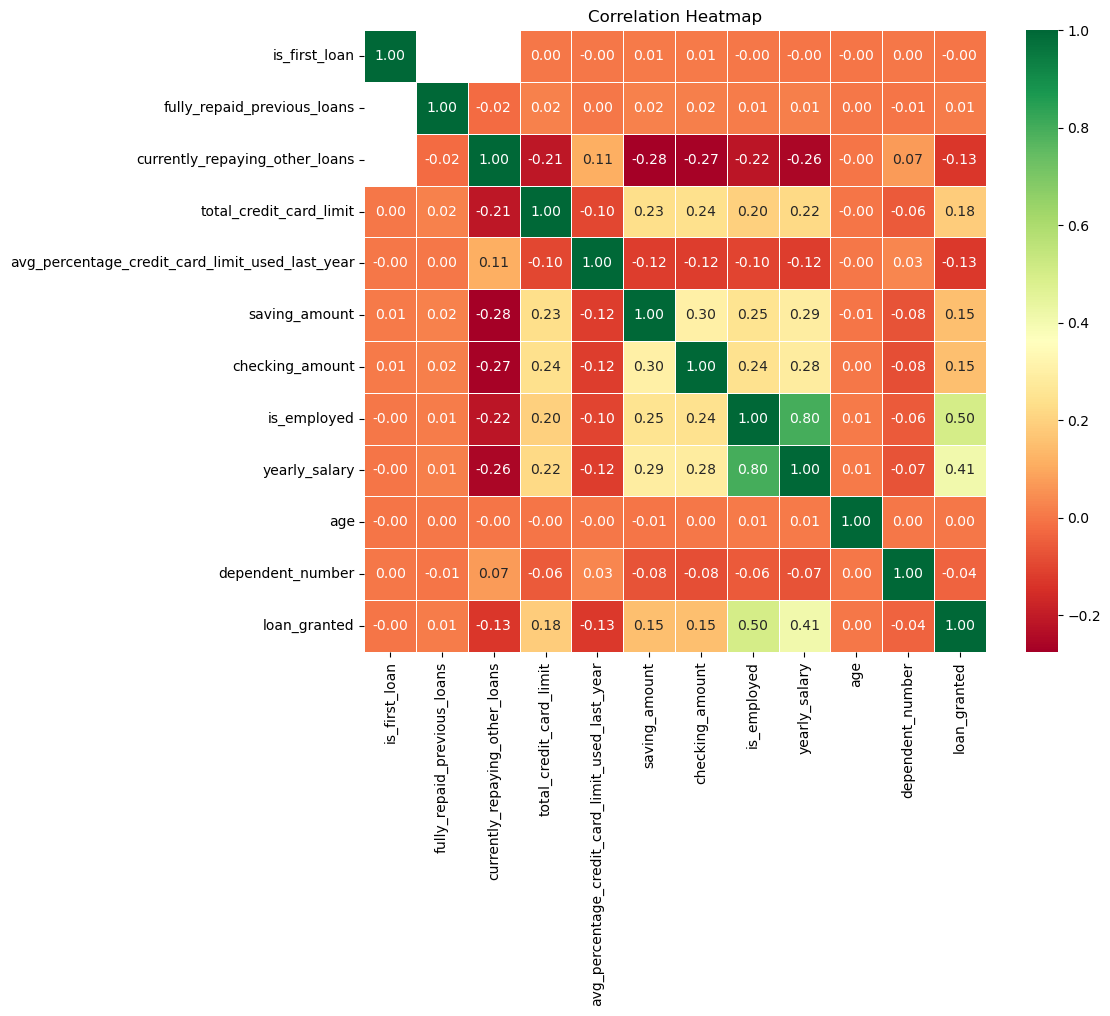

In [27]:
# Create the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, square=True)

plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

<div class="alert alert-danger"> 
Most correlations are below 0.5, except for a strong correlation (0.80) between yearly_salary and is_employed, indicating potential multicollinearity. Correlations involving age are very low, posing no concern.<br><br>
Conclusion: The high correlation between yearly_salary and is_employed may lead to multicollinearity issues. However, since both of these attributes are relevant in finding potential bias, we cannot remove any of these columns. This has also been handled by transforming these attributes at later stage.</div>

 <div class="alert alert-warning">Pairplot</div>

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


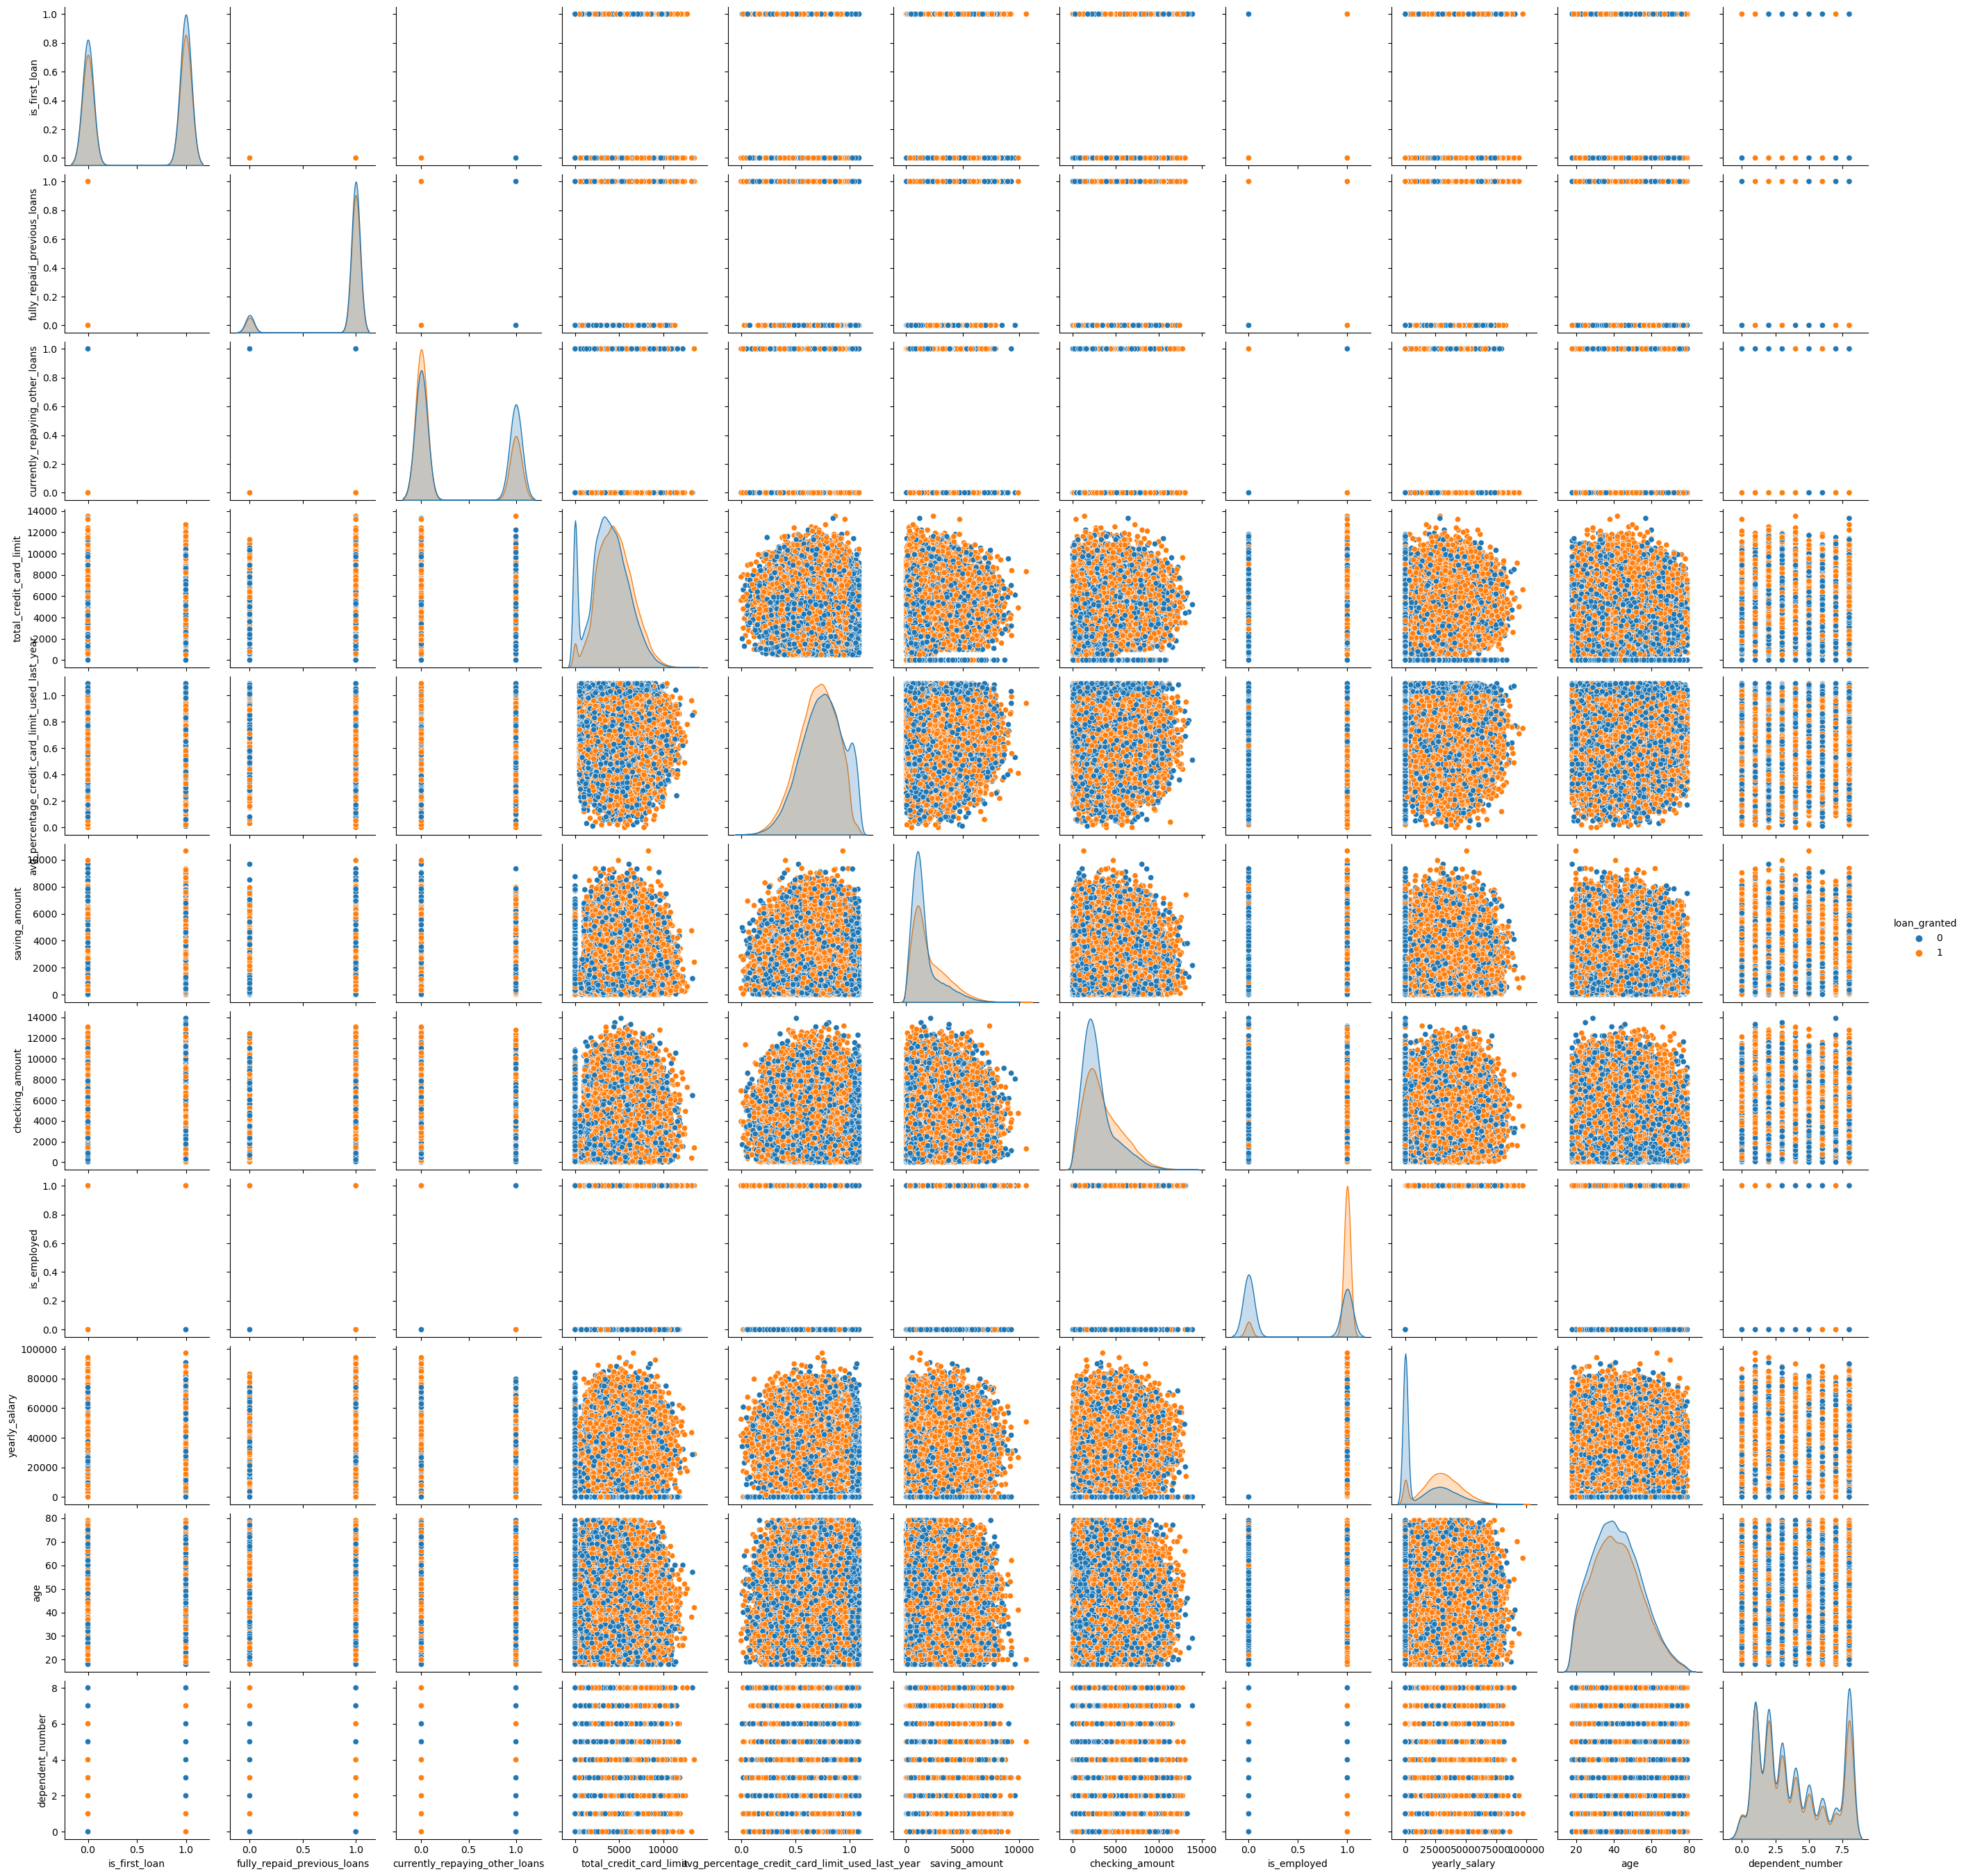

In [28]:
sns.pairplot(merged_df.select_dtypes(include=['number']), hue='loan_granted')
# Show the plot
plt.show()

 <div class="alert alert-warning">Skewness and Kurtosis Check</div>

In [29]:
skewness = merged_df.select_dtypes(include=['number']).skew()
print(skewness)

is_first_loan                                     -0.174631
fully_repaid_previous_loans                       -2.653694
currently_repaying_other_loans                     0.563844
total_credit_card_limit                            0.084087
avg_percentage_credit_card_limit_used_last_year   -0.301263
saving_amount                                      1.403283
checking_amount                                    1.044400
is_employed                                       -0.669305
yearly_salary                                      0.382290
age                                                0.313038
dependent_number                                   0.429907
loan_granted                                       0.114770
dtype: float64


<div class="alert alert-success">
The attributes that show significant skewness include fully_repaid_previous_loans (highly negatively skewed), currently_repaying_other_loans, saving_amount, checking_amount, and is_employed. These features exhibit either positive or negative skewness, indicating that their distributions are not symmetrical and may require transformation to improve model performance. Other attributes have skewness values closer to zero, suggesting more balanced distributions.</div>

In [30]:
kurtosis = merged_df.select_dtypes(include=['number']).kurtosis()
print(kurtosis)

is_first_loan                                     -1.969543
fully_repaid_previous_loans                        5.042310
currently_repaying_other_loans                    -1.682153
total_credit_card_limit                           -0.168438
avg_percentage_credit_card_limit_used_last_year   -0.280031
saving_amount                                      1.788766
checking_amount                                    0.842597
is_employed                                       -1.552062
yearly_salary                                     -0.875378
age                                               -0.460786
dependent_number                                  -1.224547
loan_granted                                      -1.986867
dtype: float64


<div class="alert alert-success">
    The attributes with significant kurtosis include fully_repaid_previous_loans (kurtosis = 5.04), indicating a distribution with heavy tails. Additionally, saving_amount and checking_amount have positive kurtosis values (1.79 and 0.84, respectively), suggesting distributions that are more peaked than a normal distribution. Attributes like is_first_loan, currently_repaying_other_loans, is_employed, and loan_granted show negative kurtosis, indicating flatter distributions with light tails compared to a normal distribution. The remaining attributes have kurtosis values closer to zero, suggesting distributions that are approximately normal in shape.
</div>

<div class="alert alert-warning"><center><h1>Data Preparation</h1></center></div>

<div class="alert alert-warning">Data Formatting </div>
 

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 14 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   is_first_loan                                    101100 non-null  int64  
 1   fully_repaid_previous_loans                      46153 non-null   float64
 2   currently_repaying_other_loans                   46153 non-null   float64
 3   total_credit_card_limit                          101100 non-null  int64  
 4   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64
 5   saving_amount                                    101100 non-null  int64  
 6   checking_amount                                  101100 non-null  int64  
 7   is_employed                                      101100 non-null  int64  
 8   yearly_salary                                    101100 non-null  int64  
 9   age            

In [32]:
merged_df['is_first_loan'] = merged_df['is_first_loan'].astype(bool)

In [33]:
merged_df['is_employed'] = merged_df['is_employed'].astype(bool)

In [34]:
# Target variable
merged_df['loan_granted'] = merged_df['loan_granted'].astype(bool)

<div class="alert alert-success">
We converted necessary attributes to boolean value.
    </div>

In [35]:
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y-%m-%d')

<div class="alert alert-success">
We fixed the datetime format (YY-MM-DD).
    </div>

<div class="alert alert-warning">Label Encoding </div>
 

In [36]:
merged_df['loan_purpose'].value_counts()

loan_purpose
home               24314
business           21707
investment         21484
emergency_funds    18091
other              15504
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df['loan_purpose_encoded'] = le.fit_transform(merged_df['loan_purpose'])

In [38]:
merged_df['loan_purpose_encoded'].value_counts()

loan_purpose_encoded
2    24314
0    21707
3    21484
1    18091
4    15504
Name: count, dtype: int64

<div class="alert alert-success">We have not used rank mapping as order doesnt have any value here and one hot encoding because we dont want multiple columns.</div>

<div class="alert alert-warning">Datetime Fix </div>
 

In [39]:
# Gregorian ordinal values
merged_df['date_encoded'] = merged_df['date'].apply(lambda x: x.toordinal())

<div class="alert alert-success">
We converted datetime value to gregorian ordinal values.
    </div>

In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   is_first_loan                                    101100 non-null  bool          
 1   fully_repaid_previous_loans                      46153 non-null   float64       
 2   currently_repaying_other_loans                   46153 non-null   float64       
 3   total_credit_card_limit                          101100 non-null  int64         
 4   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64       
 5   saving_amount                                    101100 non-null  int64         
 6   checking_amount                                  101100 non-null  int64         
 7   is_employed                                      101100 non-null  bool          
 8   yearly_salary           

<div class="alert alert-success">
We confirmed that all the data types are successfully converted for future research but we identified the null values in the Non-Null column and we are addressing that below.
    </div>

<div class="alert alert-warning">Fixing the Null Values & Imputation</div>
 

In [41]:
merged_df.head()

is_first_loan  fully_repaid_previous_loans  currently_repaying_other_loans  \
0           True                          NaN                             NaN   
1          False                          1.0                             0.0   
2           True                          NaN                             NaN   
3          False                          1.0                             0.0   
4          False                          0.0                             0.0   

   total_credit_card_limit  avg_percentage_credit_card_limit_used_last_year  \
0                     8000                                             0.49   
1                     4500                                             1.03   
2                     6900                                             0.82   
3                     1200                                             0.82   
4                     6900                                             0.80   

   saving_amount  checking_amount  is_employed  yearly_salary  age  \
0           3285             1073        False              0   47   
1            636             5299         True          13500   33   
2           2085             3422         True          24500   38   
3            358             3388        False              0   24   
4           2138             4282         True          18100   36   

   dependent_number     loan_purpose       date  loan_granted  \
0                 3         business 2012-01-31         False   
1                 1       investment 2012-11-02         False   
2                 8            other 2012-07-16          True   
3                 1       investment 2012-06-05         False   
4                 1  emergency_funds 2012-11-28         False   

   loan_purpose_encoded  date_encoded  
0                     0        734533  
1                     3        734809  
2                     4        734700  
3                     3        734659  
4                     1        734835

In [184]:
# Replace NaN values with -1 for is_first_loan in the fully_repaid_previous_loans & currently_repaying_other_loans
merged_df.loc[(merged_df['is_first_loan'] == 1) & (merged_df['fully_repaid_previous_loans'].isnull()), 
              'fully_repaid_previous_loans'] = -1
merged_df.loc[(merged_df['is_first_loan'] == 1) & (merged_df['currently_repaying_other_loans'].isnull()), 
              'currently_repaying_other_loans'] = -1

In [43]:
# Replacing NaN in avg_percentage_credit_card_limit_used_last_year  
merged_df.loc[(merged_df['total_credit_card_limit'] == 0) & (merged_df['avg_percentage_credit_card_limit_used_last_year'].isnull()), 
              'avg_percentage_credit_card_limit_used_last_year'] = 0

<div class="alert alert-success">
We handled the null values here in this code block. Since, the applicant is applying for its first loan it is not relevant to add 0 values to these columns of fully_repaid_previous_loans and currently_repaying_other_loans. Hence we imputed it with -1. And for the avg_percentage_credit_card_limit_used_last_year we replaced Null values with 0.    </div>

In [44]:
# Verify null values
missing_values_updated = merged_df[['fully_repaid_previous_loans', 'currently_repaying_other_loans', 
                                    'avg_percentage_credit_card_limit_used_last_year']].isnull().sum()
print(missing_values_updated)

fully_repaid_previous_loans                        0
currently_repaying_other_loans                     0
avg_percentage_credit_card_limit_used_last_year    0
dtype: int64


In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   is_first_loan                                    101100 non-null  bool          
 1   fully_repaid_previous_loans                      101100 non-null  float64       
 2   currently_repaying_other_loans                   101100 non-null  float64       
 3   total_credit_card_limit                          101100 non-null  int64         
 4   avg_percentage_credit_card_limit_used_last_year  101100 non-null  float64       
 5   saving_amount                                    101100 non-null  int64         
 6   checking_amount                                  101100 non-null  int64         
 7   is_employed                                      101100 non-null  bool          
 8   yearly_salary           

<div class="alert alert-success">
We confirmed that we have no null values as per the dataset information.</div>

In [46]:
merged_df.describe()

fully_repaid_previous_loans  currently_repaying_other_loans  \
count                101100.000000                   101100.000000   
mean                     -0.132957                       -0.377171   
min                      -1.000000                       -1.000000   
25%                      -1.000000                       -1.000000   
50%                      -1.000000                       -1.000000   
75%                       1.000000                        0.000000   
max                       1.000000                        1.000000   
std                       0.967656                        0.753366   

       total_credit_card_limit  \
count            101100.000000   
mean               4112.743818   
min                   0.000000   
25%                2700.000000   
50%                4100.000000   
75%                5500.000000   
max               13500.000000   
std                2129.121462   

       avg_percentage_credit_card_limit_used_last_year  saving_amount  \
count                                    101100.000000  101100.000000   
mean                                          0.674202    1799.617616   
min                                           0.000000       0.000000   
25%                                           0.560000     834.000000   
50%                                           0.710000    1339.000000   
75%                                           0.850000    2409.000000   
max                                           1.090000   10641.000000   
std                                           0.256994    1400.545141   

       checking_amount  yearly_salary            age  dependent_number  \
count    101100.000000  101100.000000  101100.000000     101100.000000   
mean       3177.150821   21020.727992      41.491632          3.864748   
min           0.000000       0.000000      18.000000          0.000000   
25%        1706.000000       0.000000      32.000000          2.000000   
50%        2673.000000   21500.000000      41.000000          3.000000   
75%        4241.000000   35300.000000      50.000000          6.000000   
max       13906.000000   97200.000000      79.000000          8.000000   
std        2044.448155   18937.581415      12.825570          2.635491   

                                date  loan_purpose_encoded   date_encoded  
count                         101100         101100.000000  101100.000000  
mean   2012-06-30 02:13:28.451038464              1.910851  734684.092690  
min              2012-01-02 00:00:00              0.000000  734504.000000  
25%              2012-04-02 00:00:00              1.000000  734595.000000  
50%              2012-06-29 00:00:00              2.000000  734683.000000  
75%              2012-09-28 00:00:00              3.000000  734774.000000  
max              2012-12-28 00:00:00              4.000000  734865.000000  
std                              NaN              1.362263     104.983316

<div class="alert alert-warning"><center><h1>Feature Selection</h1></center></div>
 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler

X = merged_df.select_dtypes(include=['number', 'bool']).drop('loan_granted', axis=1)
y = merged_df['loan_granted']

list(merged_df.select_dtypes(include=['number', 'bool']))
list(X)

['is_first_loan',
 'fully_repaid_previous_loans',
 'currently_repaying_other_loans',
 'total_credit_card_limit',
 'avg_percentage_credit_card_limit_used_last_year',
 'saving_amount',
 'checking_amount',
 'is_employed',
 'yearly_salary',
 'age',
 'dependent_number',
 'loan_purpose_encoded',
 'date_encoded']

<div class="alert alert-success">
We constructed X and y based on the numerical and boolean value columns to be used for feature selection methods. </div>

<div class="alert alert-warning">Filter Method - Pearson Correlation </div>
 

In [48]:
def cor_selector(X, y, num_features):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in feature_name:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y, 6)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

6 selected features
['avg_percentage_credit_card_limit_used_last_year', 'checking_amount', 'saving_amount', 'total_credit_card_limit', 'yearly_salary', 'is_employed']


<div class="alert alert-success">
Six features were selected using Pearson Correlation Filter Methods. </div>

<div class="alert alert-warning">Wrapper based Method - Forward Selection </div>

In [50]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Forward Selection
sfs_forward = SFS(model, k_features='best', forward=True, floating=False, scoring='accuracy', cv=5)
sfs_forward = sfs_forward.fit(X_train, y_train)

# Get selected feature names
selected_features_forward = X.columns[list(sfs_forward.k_feature_idx_)]
print("Selected features by Forward Selection:", selected_features_forward.tolist())

Selected features by Forward Selection: ['is_first_loan', 'fully_repaid_previous_loans', 'currently_repaying_other_loans', 'total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year', 'is_employed']


<div class="alert alert-success">
Six features were selected using Foward Selection Wrapper Based Methods. </div>

<div class="alert alert-warning">Wrapper based Method - Backward Selection </div>

In [51]:
# Scale the data and convert it back to a DataFrame
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Backward Elimination
sfs_backward = SFS(model, k_features='best', forward=False, floating=False, scoring='accuracy', cv=5)
sfs_backward = sfs_backward.fit(X_train, y_train)

# Get the selected features as column names
selected_features_backward = X.columns[list(sfs_backward.k_feature_idx_)]
print("Selected features by Backward Elimination:", selected_features_backward.tolist())

Selected features by Backward Elimination: ['currently_repaying_other_loans', 'total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year', 'is_employed', 'age']


<div class="alert alert-success">
Six features were selected using Backward Selection Wrapper Based Methods. </div>

<div class="alert alert-warning">Wrapper based Method - Stepwise Selection </div>

In [52]:
# Scale the data and convert it back to a DataFrame
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Stepwise Selection (Forward + Backward)
sfs_stepwise = SFS(model, k_features='best', forward=True, floating=True, scoring='accuracy', cv=5)
sfs_stepwise = sfs_stepwise.fit(X_train, y_train)

# Get the selected features as column names
selected_features_stepwise = X.columns[list(sfs_stepwise.k_feature_idx_)]
print("Selected features by Stepwise Selection:", selected_features_stepwise.tolist())

Selected features by Stepwise Selection: ['is_first_loan', 'currently_repaying_other_loans', 'total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year', 'is_employed']


<div class="alert alert-success">
Six features were selected using Stepwise Selection Wrapper Based Methods. </div>

<div class="alert alert-warning">Embedded Method - LASSO </div>

In [53]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
selected_features_lasso = X.columns[reg.coef_ != 0].tolist()
selected_features_lasso

Best alpha using built-in LassoCV: 3.877020
Best score using built-in LassoCV: 0.177663
Lasso picked 4 variables and eliminated the other 9 variables


['total_credit_card_limit',
 'saving_amount',
 'checking_amount',
 'yearly_salary']

<div class="alert alert-success">
Only four features were selected using LASSO Methods. </div>

<div class="alert alert-warning">Finding overlaps among the models </div>

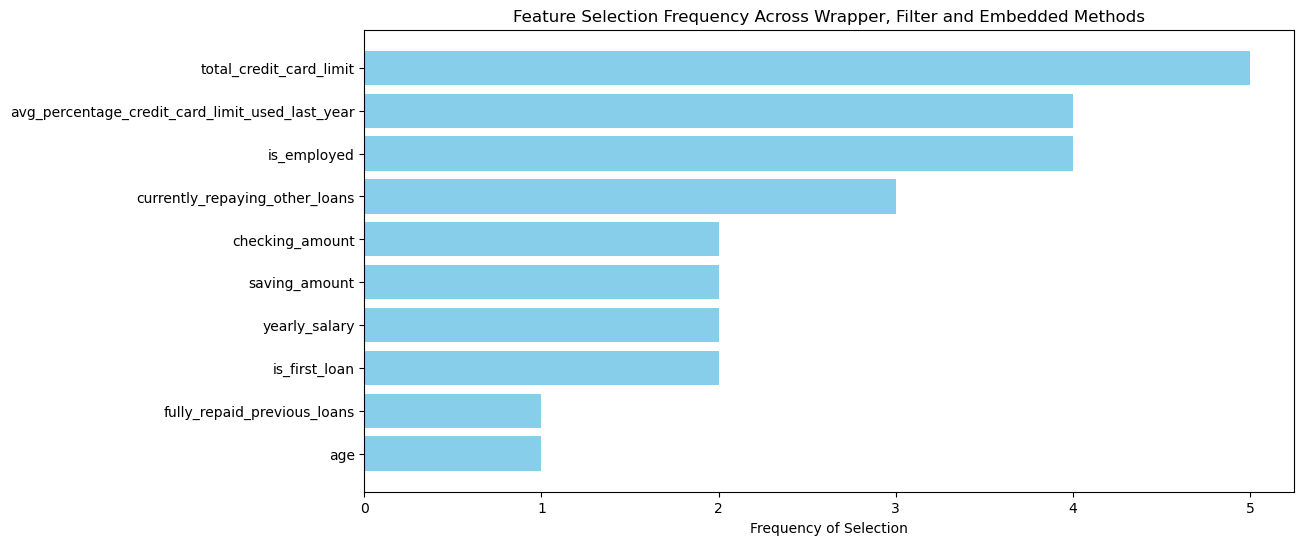

In [54]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all selected features from the lists into one
all_selected_features = cor_feature + selected_features_forward.tolist() + selected_features_backward.tolist() + selected_features_stepwise.tolist() + selected_features_lasso

# Count the frequency of each feature
feature_counts = Counter(all_selected_features)

# Extract features and their counts
features = [item[0] for item in feature_counts.most_common()]
counts = [item[1] for item in feature_counts.most_common()]

plt.figure(figsize=(12, 6))
plt.barh(features, counts, color='skyblue')
plt.xlabel('Frequency of Selection')
plt.title('Feature Selection Frequency Across Wrapper, Filter and Embedded Methods')
plt.gca().invert_yaxis()
plt.show()


In [55]:
selected_columns = list(set(all_selected_features))
selected_columns

['yearly_salary',
 'saving_amount',
 'is_first_loan',
 'avg_percentage_credit_card_limit_used_last_year',
 'fully_repaid_previous_loans',
 'currently_repaying_other_loans',
 'checking_amount',
 'is_employed',
 'total_credit_card_limit',
 'age']

<div class="alert alert-success">
Based on the overlaps from feature selection methods, we planned to go with these ten selected variables. </div>

<div class="alert alert-warning"><center><h1>Scaling, Transformation & Normalization</h1></center></div>
 

In [56]:
# Adjust the number of rows and columns for the grid based on the length of selected_columns
num_columns = len(selected_columns)
rows = (num_columns // 3) + int(num_columns % 3 > 0)  # Calculate rows needed for a 4-column grid

# Create a grid for the plots
fig, axes = plt.subplots(rows, 3, figsize=(15, 3 * rows))  # Adjust rows dynamically based on the number of columns

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through selected columns and plot
for i, column in enumerate(selected_columns):
    sns.histplot(merged_df[column], bins='auto', ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<div class="alert alert-success">
We plotted all the selected features and as we were using classification methods, we assumed that the distribution of our variables is normal. Hence, we need to transform, scale and normalize our selected features to be used for modelling. </div>

In [193]:
sns.histplot(merged_df['saving_amount'], bins='auto', kde=True)

<Axes: xlabel='saving_amount', ylabel='Count'>

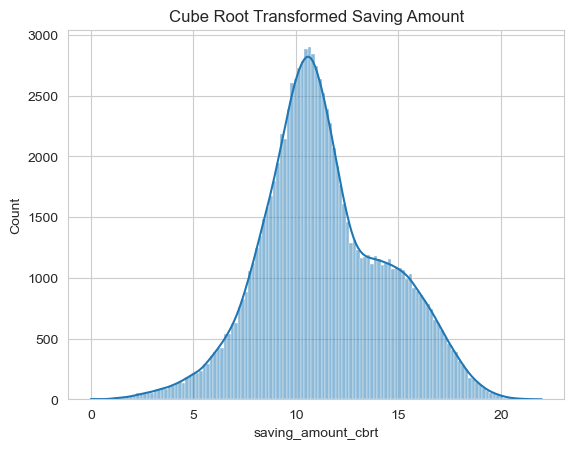

In [194]:
merged_df['saving_amount_cbrt'] = np.cbrt(merged_df['saving_amount'])

# Plot the transformed data
sns.histplot(merged_df['saving_amount_cbrt'], bins='auto', kde=True)
plt.title('Cube Root Transformed Saving Amount')
plt.show()

<div class="alert alert-success">
We used cube root transformation to fix positive skewness in saving amount. </div>

In [195]:
sns.histplot(merged_df['total_credit_card_limit'], bins=20, kde=True)

<Axes: xlabel='total_credit_card_limit', ylabel='Count'>

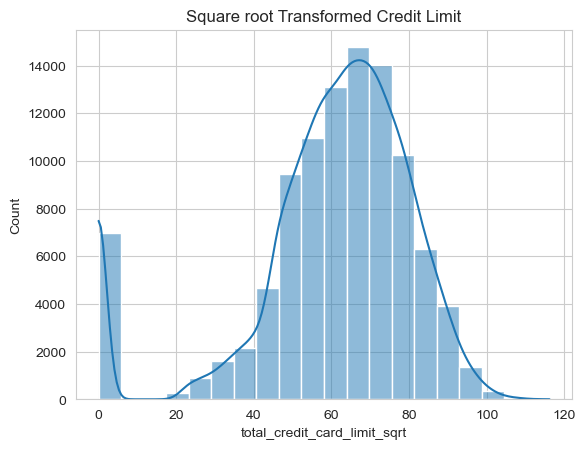

In [196]:
# Apply Square Root transformation
merged_df['total_credit_card_limit_sqrt'] = np.sqrt(merged_df['total_credit_card_limit'])
# Plot the transformed data
sns.histplot(merged_df['total_credit_card_limit_sqrt'], bins=20, kde=True)
plt.title('Square root Transformed Credit Limit')
plt.show()

<div class="alert alert-success">
We used square root transformation to fix positive skewness in total credit card limit. </div>

<Axes: xlabel='yearly_salary', ylabel='Count'>

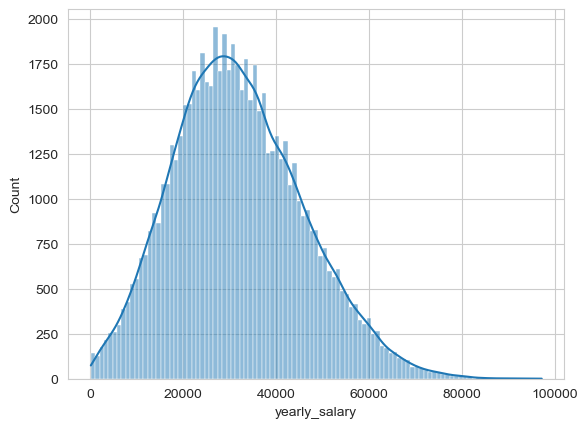

In [197]:
sns.histplot(merged_df[merged_df['yearly_salary']>0]['yearly_salary'], bins='auto', kde=True)

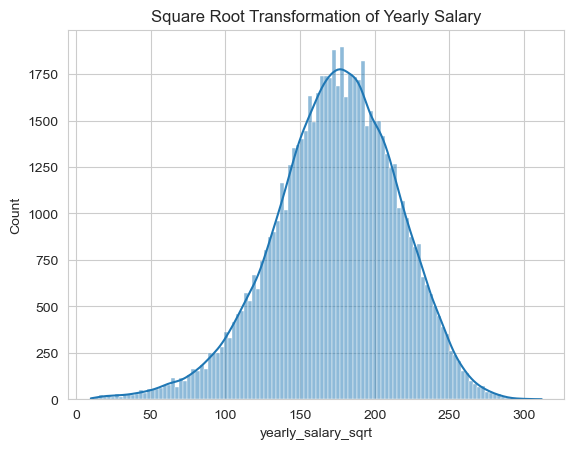

In [198]:
merged_df['yearly_salary_sqrt'] = np.sqrt(merged_df['yearly_salary'])

# Plot the new transformation
sns.histplot(merged_df[merged_df['yearly_salary_sqrt']>0]["yearly_salary_sqrt"], bins='auto', kde=True)
plt.title('Square Root Transformation of Yearly Salary')
plt.show()

<div class="alert alert-success">
We used square root transformation to fix positive skewness in yearly salary. </div>

<Axes: xlabel='avg_percentage_credit_card_limit_used_last_year', ylabel='Count'>

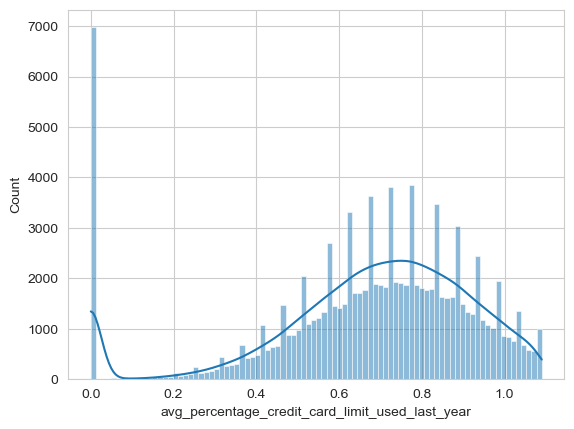

In [199]:
sns.histplot(merged_df['avg_percentage_credit_card_limit_used_last_year'], bins='auto', kde=True)

In [200]:
merged_df['avg_percentage_credit_card_limit_used_last_year_log'] = np.log1p(merged_df['avg_percentage_credit_card_limit_used_last_year'])
# Plot the transformed data
sns.histplot(merged_df['avg_percentage_credit_card_limit_used_last_year_log'], bins='auto', kde=True)
plt.title('Log Transformed Average Percentage Credit Card Limits')
plt.show()

<div class="alert alert-success">
We used log transformation to fix negative skewness in average percentage credit card limit used last year. </div>

In [201]:
sns.histplot(merged_df['age'], bins=20, kde=True)

<Axes: xlabel='age', ylabel='Count'>

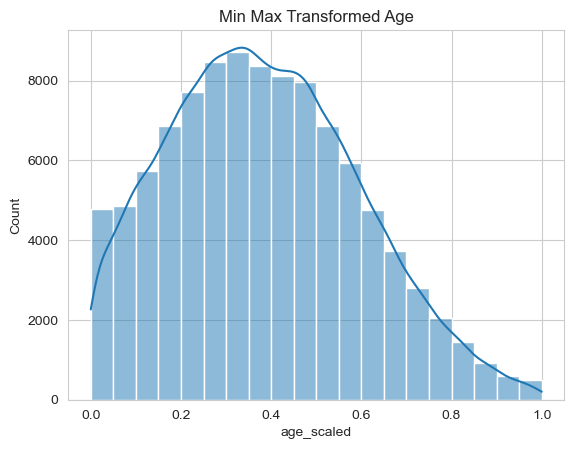

In [202]:
from sklearn.preprocessing import MinMaxScaler
# Scale 
scaler = MinMaxScaler()
merged_df['age_scaled'] = scaler.fit_transform(merged_df[['age']])
sns.histplot(merged_df['age_scaled'], bins=20, kde=True)
plt.title('Min Max Transformed Age')
plt.show()

<div class="alert alert-success">
We used min max scaler transformation to fix positive skewness in age. </div>

<Axes: xlabel='checking_amount', ylabel='Count'>

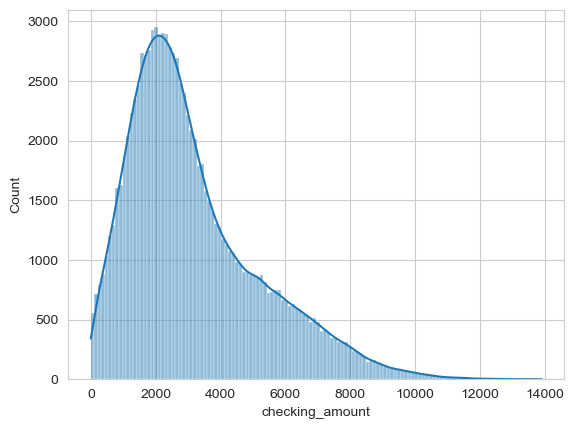

In [203]:
sns.histplot(merged_df['checking_amount'], bins='auto', kde=True)

In [204]:
merged_df['checking_amount_cbrt'] = np.cbrt(merged_df['checking_amount'])
# Plot the transformed data
sns.histplot(merged_df['checking_amount_cbrt'], bins='auto', kde=True)
plt.title('Cube Root Transformed Checking Amount')
plt.show()

<div class="alert alert-success">
We used cube root transformation to fix positive skewness in checking amount. </div>

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


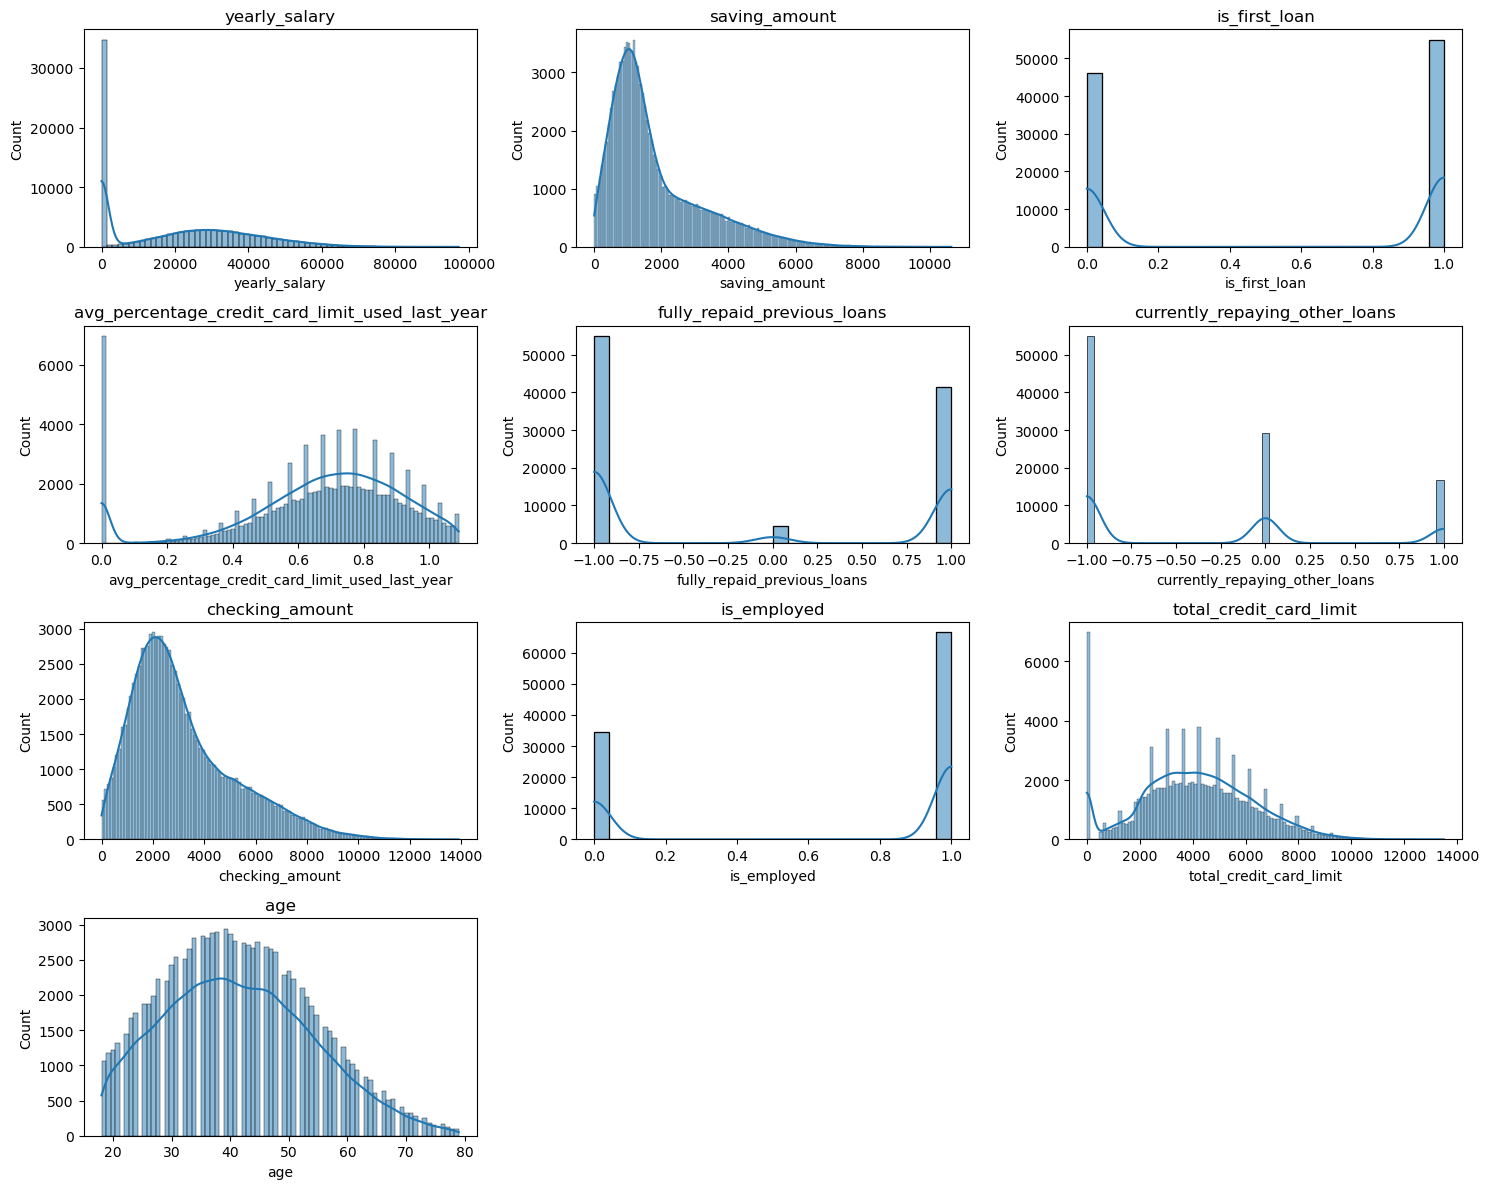

In [69]:
num_columns = len(selected_columns)
rows = (num_columns // 3) + int(num_columns % 3 > 0)  # Calculate rows needed for a 4-column grid

# Create a grid for the plots
fig, axes = plt.subplots(rows, 3, figsize=(15, 3 * rows))  # Adjust rows dynamically based on the number of columns

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through selected columns and plot
for i, column in enumerate(selected_columns):
    sns.histplot(merged_df[column], bins='auto', ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


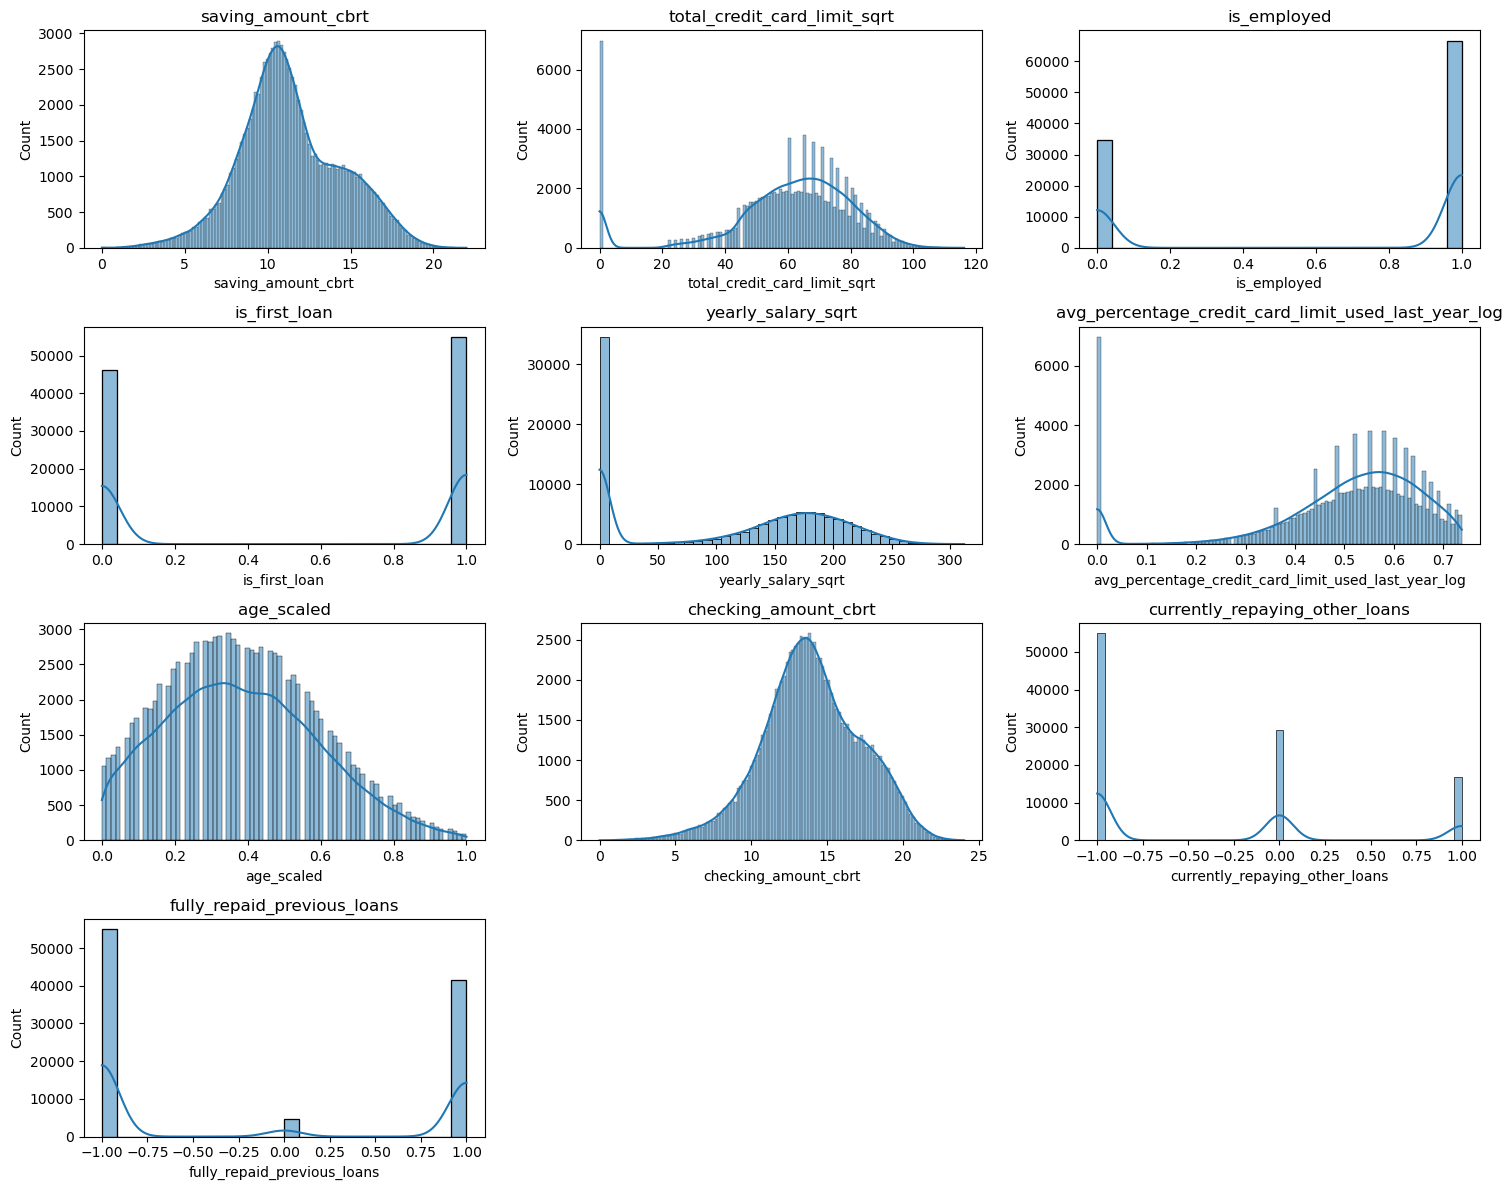

In [70]:
finalised_columns = ['saving_amount_cbrt', 'total_credit_card_limit_sqrt', 'is_employed', 'is_first_loan', 'yearly_salary_sqrt', 'avg_percentage_credit_card_limit_used_last_year_log',
'age_scaled', 'checking_amount_cbrt', 'currently_repaying_other_loans',
 'fully_repaid_previous_loans']
num_columns = len(finalised_columns)
rows = (num_columns // 3) + int(num_columns % 3 > 0)  # Calculate rows needed for a 4-column grid

# Create a grid for the plots
fig, axes = plt.subplots(rows, 3, figsize=(15, 3 * rows))  # Adjust rows dynamically based on the number of columns

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through selected columns and plot
for i, column in enumerate(finalised_columns):
    sns.histplot(merged_df[column], bins='auto', ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div class="alert alert-success">
The graphs shows the comparison that we have normalized the selected columns. </div>

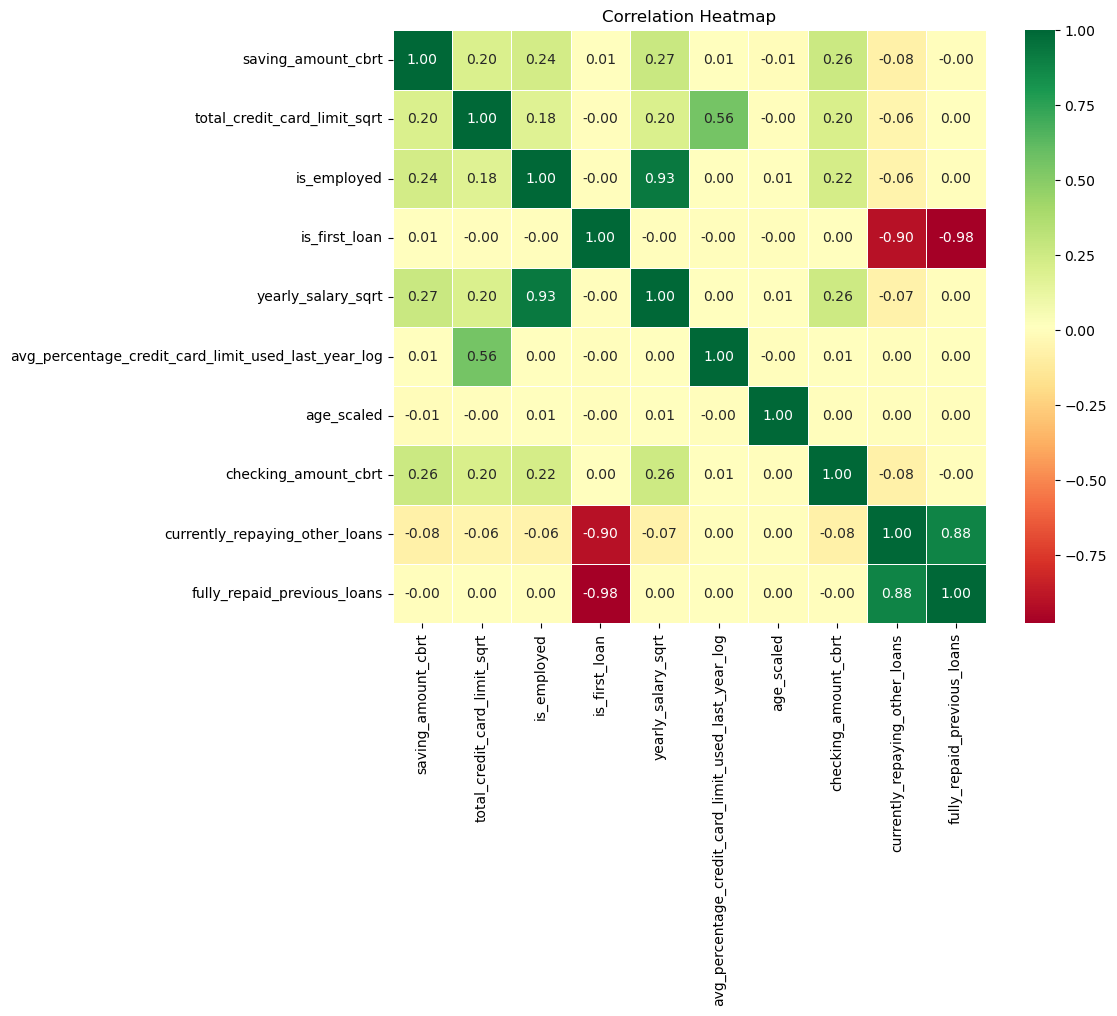

In [71]:
correlation_matrix = merged_df[finalised_columns].corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, square=True)

plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

<div class="alert alert-success">
The heatmap shows the correlation between various features. Key observations include a strong positive correlation between fully_repaid_previous_loans and currently_repaying_other_loans and a high correlation of is_employed with yearly_salary_sqrt. Negative correlations are observed between is_first_loan and both currently_repaying_other_loans and fully_repaid_previous_loans, indicating an inverse relationship. Most other features have weak to moderate correlations. This suggests that certain features are more predictive and interconnected than others.
 </div><div class="alert alert-info">
The reason we are still using highly positive and negative correlated variables is that their inclusion aligns with the business problem we are trying to address. In particular, when dealing with fairness and bias detection in predictive models, it is important to evaluate how sensitive attributes and their interactions with other variables influence the model's predictions. This allows us to identify potential biases, understand model behavior and ensure fairness across different groups.
</div>

<div class="alert alert-warning">Outlier Detection </div>
 

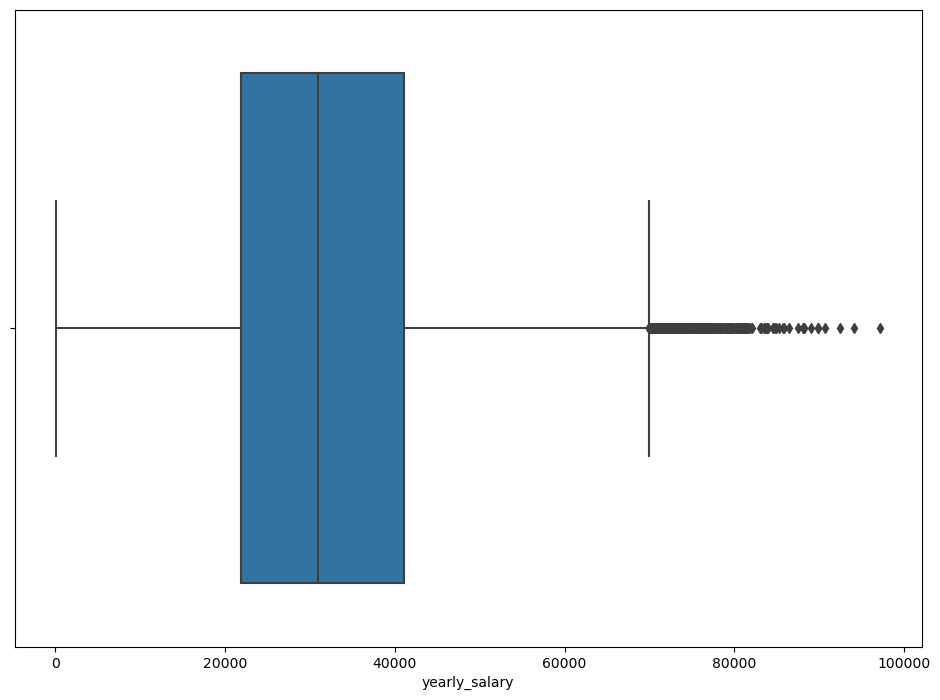

In [72]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x=merged_df[merged_df['yearly_salary']>0]["yearly_salary"])

<div class="alert alert-danger">
    This boxplot shows the outliers in the yearly salary. </div>

In [73]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x=merged_df[merged_df['yearly_salary_sqrt']>0]["yearly_salary_sqrt"])


<div class="alert alert-success">
    This boxplot shows the outliers in the yearly salary is resolved using square root transformation. </div>

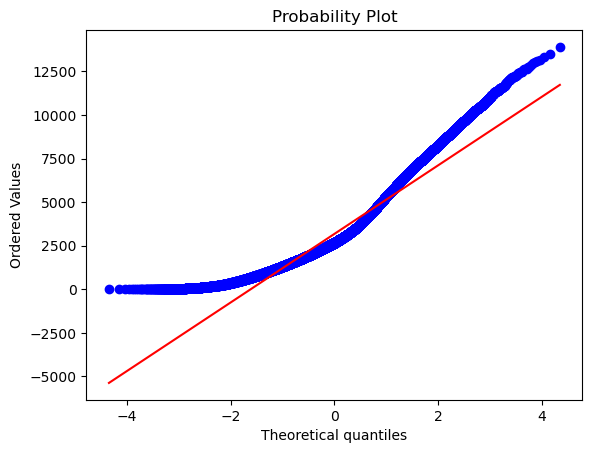

In [74]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
stats.probplot(merged_df['checking_amount'], dist="norm", plot=plt)
plt.show()

<div class="alert alert-danger">
    The Q-Q plot shows that the checking amount is not normally distributed.
    </div>

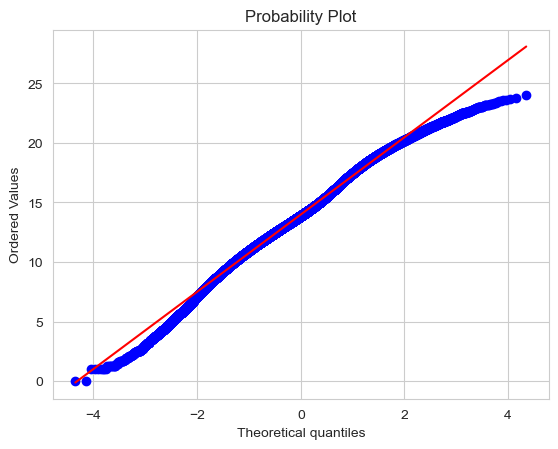

In [190]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
stats.probplot(merged_df['checking_amount_cbrt'], dist="norm", plot=plt)
plt.show()

<div class="alert alert-success">
    The Q-Q plot confirms that we have fixed the checking amount by normalizing it using cube root transformation. </div>

 <div class="alert alert-warning">Addressed Skewness and Kurtosis</div>

In [76]:
skewness = merged_df[finalised_columns].skew()
print(skewness)

saving_amount_cbrt                                     0.168658
total_credit_card_limit_sqrt                          -1.277049
is_employed                                           -0.669305
is_first_loan                                         -0.174631
yearly_salary_sqrt                                    -0.268640
avg_percentage_credit_card_limit_used_last_year_log   -1.549027
age_scaled                                             0.313038
checking_amount_cbrt                                  -0.146519
currently_repaying_other_loans                         0.745332
fully_repaid_previous_loans                            0.268062
dtype: float64


In [77]:
kurtosis = merged_df[finalised_columns].kurtosis()
print(kurtosis)

saving_amount_cbrt                                    -0.043496
total_credit_card_limit_sqrt                           1.793970
is_employed                                           -1.552062
is_first_loan                                         -1.969543
yearly_salary_sqrt                                    -1.518130
avg_percentage_credit_card_limit_used_last_year_log    2.277703
age_scaled                                            -0.460786
checking_amount_cbrt                                   0.129914
currently_repaying_other_loans                        -0.870554
fully_repaid_previous_loans                           -1.878197
dtype: float64


In [78]:
finalised_columns

['saving_amount_cbrt',
 'total_credit_card_limit_sqrt',
 'is_employed',
 'is_first_loan',
 'yearly_salary_sqrt',
 'avg_percentage_credit_card_limit_used_last_year_log',
 'age_scaled',
 'checking_amount_cbrt',
 'currently_repaying_other_loans',
 'fully_repaid_previous_loans']

<div class="alert alert-success">
    We have addressed the skewness and kurtois of the selected attributes. And above are the finalized columns. </div>

<div class="alert alert-warning">Training and Testing Split </div>

In [79]:
from sklearn.model_selection import train_test_split

X_final = merged_df[finalised_columns]
y_final = merged_df['loan_granted']

# Assuming X contains features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (80880, 10)
Testing set size: (20220, 10)


<div class="alert alert-warning"><center><h1>Model Implementation</h1></center></div>
 

<div class="alert alert-warning"><h2>Logistic Regression </h2></div>

<div class="alert alert-info">Logistic Regression Assumptions:
Logistic regression assumes that there are no significant outliers in the dataset, as these can distort results. Additionally, it requires no multicollinearity between independent variables to ensure reliable coefficient estimates. The model also assumes a linear relationship between independent variables and the log-odds of the target variable.</div>

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Initialize and train the model
log_reg = LogisticRegression(penalty='l2', solver='liblinear', C=0.1, max_iter=2000, random_state=42)

log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# Plot confusion matrix
# plt.figure(figsize=(5, 4))
# sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Logistic Regression')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


--- Logistic Regression ---
Accuracy: 0.7533135509396637
Precision: 0.680537873965627
Recall: 0.8978584925467142

Confusion Matrix:
 [[6679 4015]
 [ 973 8553]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.62      0.73     10694
        True       0.68      0.90      0.77      9526

    accuracy                           0.75     20220
   macro avg       0.78      0.76      0.75     20220
weighted avg       0.78      0.75      0.75     20220



<div class="alert alert-warning"><h2>Decision Tree </h2></div>

<div class="alert alert-info">Decision Tree Assumptions:
Decision trees make no strict assumptions about the distribution of the data, allowing for a wide range of data types including both categorical and continuous features. Unlike other classification models, decision trees are not affected by multicollinearity and do not require features to be normalized. They also can work effectively with heterogeneous datasets, providing flexibility in their use.</div>

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Initialize and train the model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features=None, random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_clf.predict(X_test)

# Evaluate the model
print("--- Decision Tree Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Plot confusion matrix
# plt.figure(figsize=(5, 4))
# sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Decision Tree')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


--- Decision Tree Classifier ---
Accuracy: 0.7796735905044511
Precision: 0.7131926343227109
Recall: 0.8904052068024354

Confusion Matrix:
 [[7283 3411]
 [1044 8482]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.68      0.77     10694
        True       0.71      0.89      0.79      9526

    accuracy                           0.78     20220
   macro avg       0.79      0.79      0.78     20220
weighted avg       0.80      0.78      0.78     20220



<div class="alert alert-warning"><h2>K-NN Classifier</h2></div>

<div class="alert alert-info">K-Nearest Neighbor (k-NN) Assumptions:
The k-NN algorithm assumes that the input features are standardized or normalized, particularly if they have different units, as distance calculations are sensitive to magnitude. It is important to keep the dimensionality low to prevent the curse of dimensionality, which can affect accuracy. The inputs should be numeric, and categorical variables must be converted to dummy variables to be included.</div>

In [211]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Initialize and train the model, configured 
knn_clf = KNeighborsClassifier(n_neighbors=11, metric='euclidean', weights='uniform')

knn_clf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
print("--- k-NN Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Plot confusion matrix
# plt.figure(figsize=(5, 4))
# sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - k-NN')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


--- k-NN Classifier ---
Accuracy: 0.7318001978239367
Precision: 0.6818222104050341
Recall: 0.8075792567709427

Confusion Matrix:
 [[7104 3590]
 [1833 7693]]

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.66      0.72     10694
        True       0.68      0.81      0.74      9526

    accuracy                           0.73     20220
   macro avg       0.74      0.74      0.73     20220
weighted avg       0.74      0.73      0.73     20220



<div class="alert alert-warning"><center><h1>Model Evaluation</h1></center></div>


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate a model
def evaluate_model(y_test, y_pred, model_name, y_proba=None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    error_rate = 1 - accuracy
    sensitivity = recall 
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Error Rate: {error_rate:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    if auc is not None:
        print(f"AUC: {auc:.2f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend()
        plt.show()

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Error Rate": error_rate,
        "Precision": precision,
        "Recall (Sensitivity)": recall,
        "F1 Score": f1,
        "AUC": auc
    }

--- Logistic Regression ---
Accuracy: 0.75
Error Rate: 0.25
Precision: 0.68
Recall (Sensitivity): 0.90
F1 Score: 0.77
AUC: 0.76

Confusion Matrix:
[[6679 4015]
 [ 973 8553]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.62      0.73     10694
        True       0.68      0.90      0.77      9526

    accuracy                           0.75     20220
   macro avg       0.78      0.76      0.75     20220
weighted avg       0.78      0.75      0.75     20220



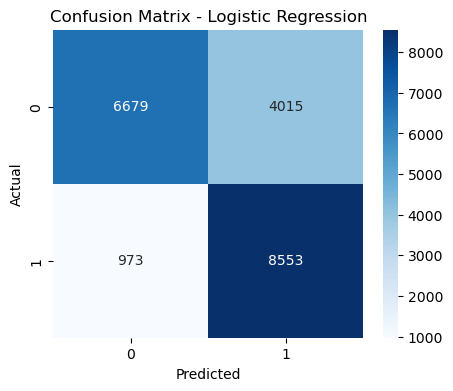

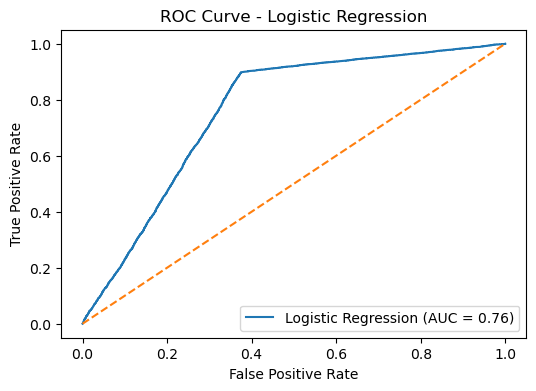

In [92]:
# Evaluate Logistic Regression
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Probability for positive class
log_reg_results = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression", y_proba=y_proba_log_reg)

<div class="alert alert-success"> The confusion matrix shows that the Logistic Regression model correctly predicted 6,679 instances as class 0 and 8,553 instances as class 1, while it misclassified 4,015 instances from class 0 to class 1 and 973 instances from class 1 to class 0. This suggests that the model has a relatively good ability to distinguish between the two classes, but some misclassification is evident, particularly from class 0 to class 1. <br>

The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate for different thresholds, with an area under the curve (AUC) of 0.76. This indicates a fair model performance, though there is room for improvement in distinguishing between positive and negative classes. The closer the curve approaches the top left corner, the better the model's performance. </div>

--- Decision Tree ---
Accuracy: 0.78
Error Rate: 0.22
Precision: 0.71
Recall (Sensitivity): 0.89
F1 Score: 0.79
AUC: 0.79

Confusion Matrix:
[[7283 3411]
 [1044 8482]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.68      0.77     10694
        True       0.71      0.89      0.79      9526

    accuracy                           0.78     20220
   macro avg       0.79      0.79      0.78     20220
weighted avg       0.80      0.78      0.78     20220



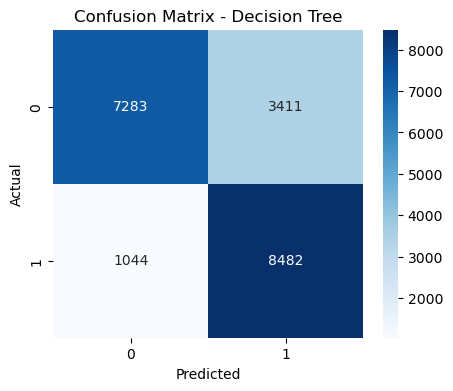

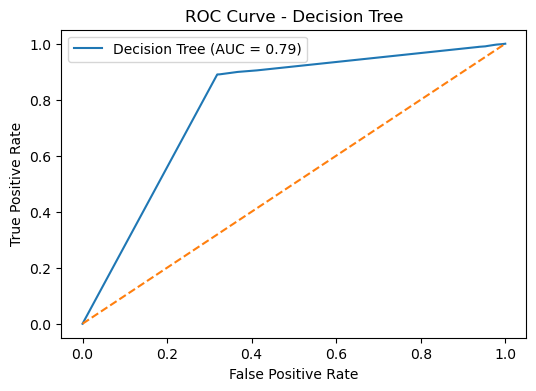

In [93]:
# Evaluate Decision Tree
y_proba_tree = tree_clf.predict_proba(X_test)[:, 1] if hasattr(tree_clf, "predict_proba") else None
tree_results = evaluate_model(y_test, y_pred_tree, "Decision Tree", y_proba=y_proba_tree)

<div class="alert alert-success">The Decision Tree model shows solid predictive performance with an AUC of 0.79, indicating a good ability to differentiate between positive and negative classes. It correctly predicts many cases but has some errors, with false positives (loans granted incorrectly) and false negatives (loans denied incorrectly) that suggest room for improvement.</div>

--- k-NN ---
Accuracy: 0.73
Error Rate: 0.27
Precision: 0.68
Recall (Sensitivity): 0.81
F1 Score: 0.74
AUC: 0.76

Confusion Matrix:
[[7104 3590]
 [1833 7693]]

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.66      0.72     10694
        True       0.68      0.81      0.74      9526

    accuracy                           0.73     20220
   macro avg       0.74      0.74      0.73     20220
weighted avg       0.74      0.73      0.73     20220



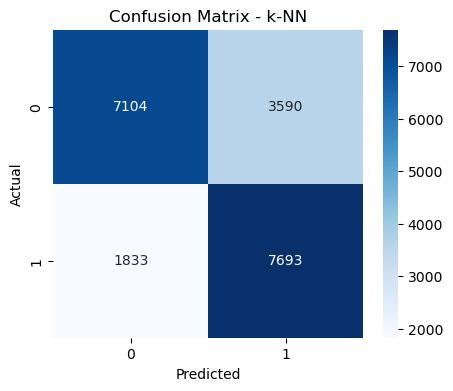

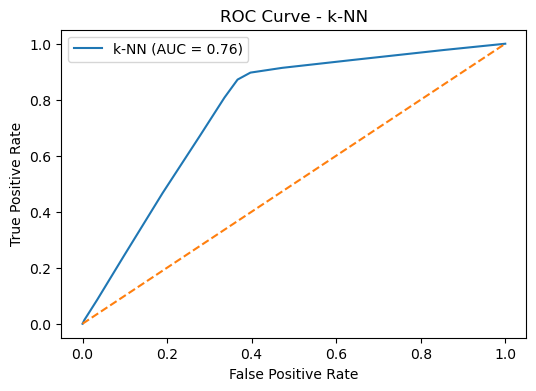

In [94]:
# Evaluate k-NN
y_proba_knn = knn_clf.predict_proba(X_test)[:, 1] if hasattr(knn_clf, "predict_proba") else None
knn_results = evaluate_model(y_test, y_pred_knn, "k-NN", y_proba=y_proba_knn)

<div class="alert alert-success">The k-NN model demonstrates moderate performance with an AUC of 0.76, indicating fair discrimination between classes. The confusion matrix shows a significant number of false negatives (1,833) and false positives (3,590). This suggests the model struggles with both identifying true positives and distinguishing true negatives accurately compared to the Decision Tree. While k-NN achieves balanced results, further tuning may be necessary to enhance predictive power and reduce classification errors.</div>

In [95]:
# Summarize results
import pandas as pd
results_df = pd.DataFrame([log_reg_results, tree_results, knn_results]).set_index("Model")
print("\nModel Comparison Summary:")
print(results_df)


Model Comparison Summary:
                     Accuracy  Error Rate  Precision  Recall (Sensitivity)  \
Model                                                                        
Logistic Regression  0.753314    0.246686   0.680538              0.897858   
Decision Tree        0.779674    0.220326   0.713193              0.890405   
k-NN                 0.731800    0.268200   0.681822              0.807579   

                     F1 Score       AUC  
Model                                    
Logistic Regression  0.774237  0.760223  
Decision Tree        0.792007  0.785336  
k-NN                 0.739392  0.763839  


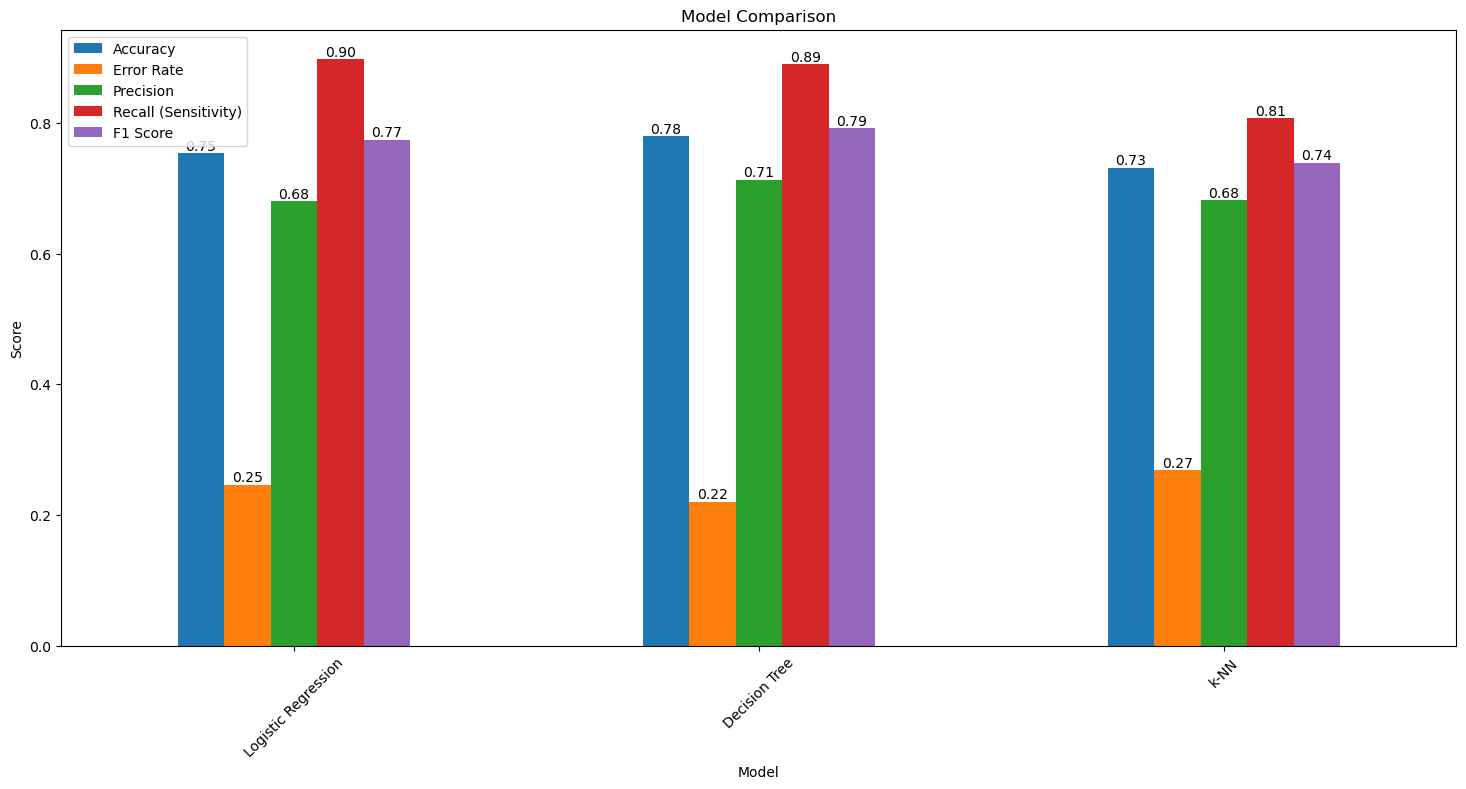

In [106]:
ax = results_df.drop(columns=["AUC"], errors='ignore').plot(kind='bar', figsize=(18, 8))

plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.show()

<div class="alert alert-success">This bar chart compares the performance metrics of three classification models: Logistic Regression, Decision Tree, and k-NN. Each model is evaluated based on Accuracy, Error Rate, Precision, Recall (Sensitivity), and F1 Score. The Decision Tree generally exhibits the highest overall accuracy (0.78), precision (0.71), recall (0.89), and F1 score (0.79), suggesting strong performance. Logistic Regression has moderate performance but falls behind in accuracy compared to the Decision Tree, whereas k-NN shows balanced but slightly lower metrics. This indicates that the Decision Tree outperforms the others in this comparison for classifying the target variable accurately while maintaining high sensitivity.</div>

--- Decision Tree Classifier ---
Training Accuracy: 0.7794015825914936
Testing Accuracy: 0.7796735905044511

Confusion Matrix (Test Set):
 [[7283 3411]
 [1044 8482]]

Classification Report (Test Set):
               precision    recall  f1-score   support

       False       0.87      0.68      0.77     10694
        True       0.71      0.89      0.79      9526

    accuracy                           0.78     20220
   macro avg       0.79      0.79      0.78     20220
weighted avg       0.80      0.78      0.78     20220



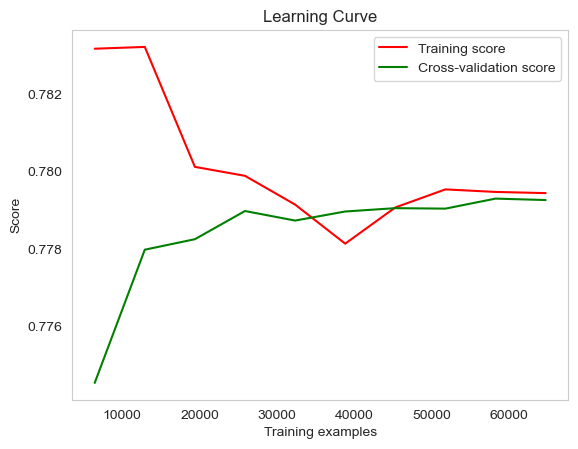

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Initialize and train the model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features=None, random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree_train = tree_clf.predict(X_train)
y_pred_tree_test = tree_clf.predict(X_test)

# Evaluate the model
print("--- Decision Tree Classifier ---")
print("Training Accuracy:", accuracy_score(y_train, y_pred_tree_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_tree_test))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_tree_test))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_tree_test))

# Plot learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve for the Decision Tree
plot_learning_curve(tree_clf, X_train, y_train)


<div class="alert alert-success">This learning curve suggests that the model is not overfitting or underfitting significantly. The training and cross-validation scores are close to each other, indicating a good balance between fitting the training data and generalizing to unseen data. Overall, it seems the model is performing reasonably well without major issues of overfitting or underfitting.</div>

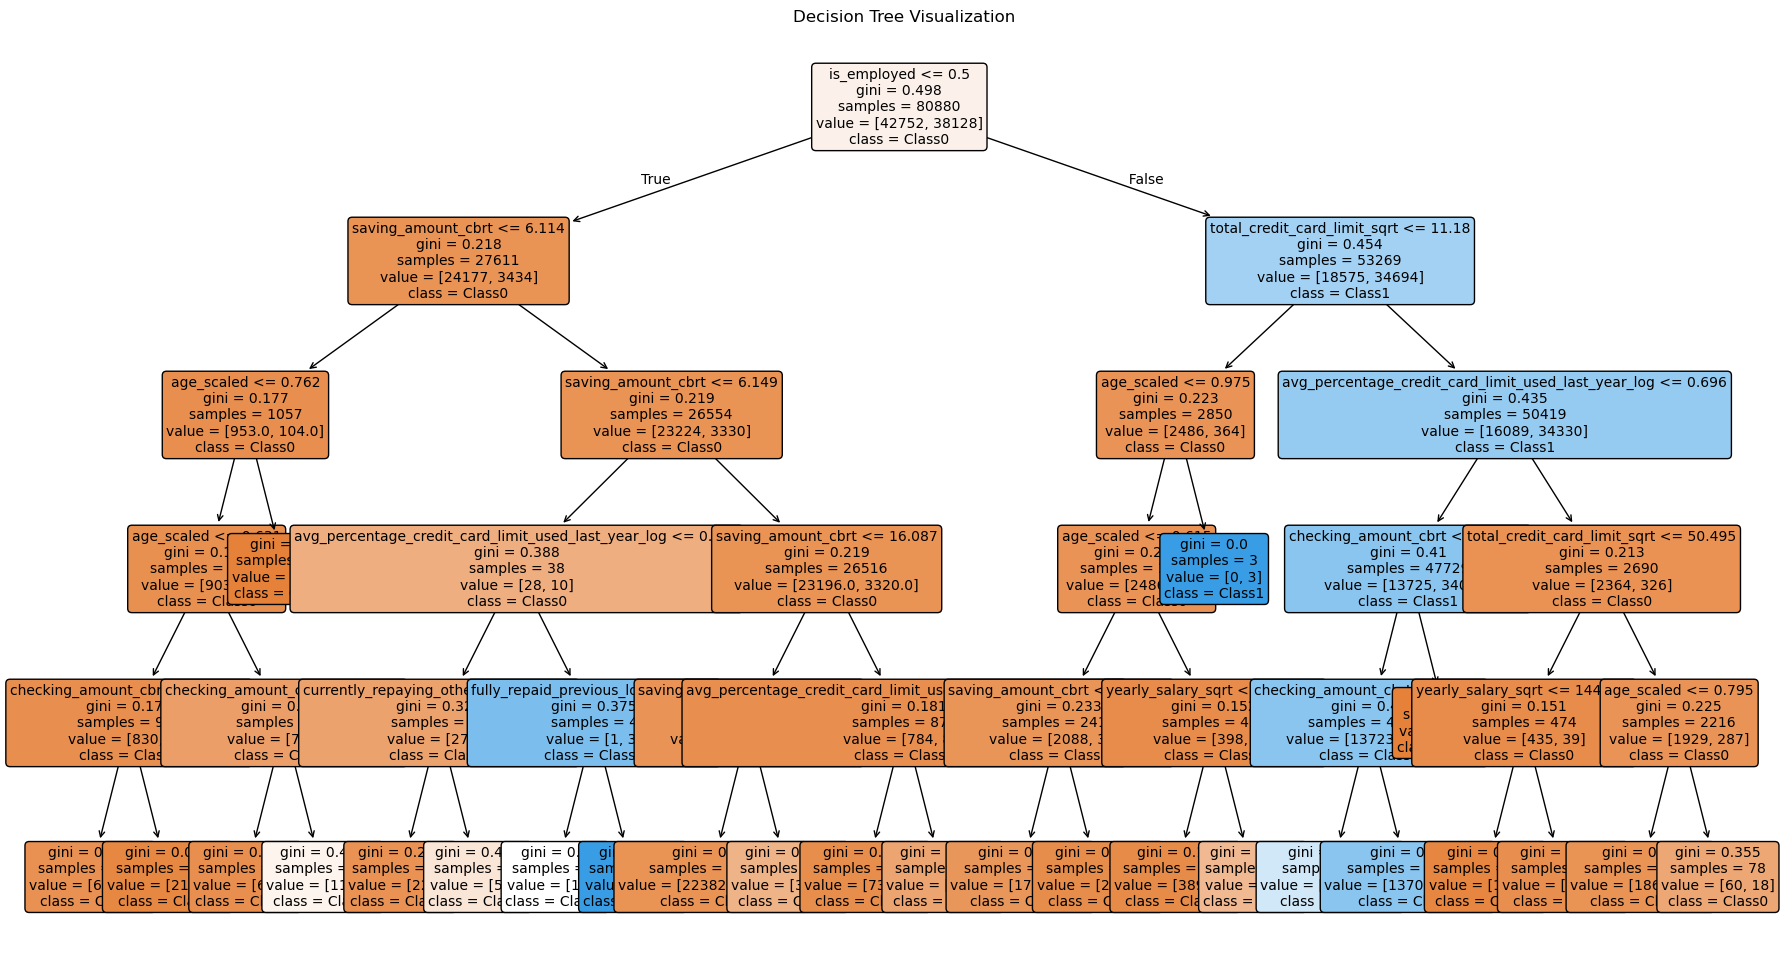

In [144]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 12))
plot_tree(tree_clf, 
          feature_names=X_train.columns, 
          class_names=['Class0', 'Class1'], 
          filled=True, 
          rounded=True, 
          fontsize=10)  
plt.title('Decision Tree Visualization')
plt.show()


<div class="alert alert-success">The Decision Tree primarily splits data based on key features such as is_employed, total_credit_card_limit_sqrt and saving_amount_cbrt indicating their importance in predicting the target variable loan_granted. The color-coded nodes show the dominance of one class at different points, with many nodes being quite pure (low Gini impurity). This demonstrats the model's confidence in its predictions based on a few influential features and shows strong classification capability.</div>

<div class="alert alert-warning"><center><h1>Prediction with best performant model </h1></center></div>


In [183]:
# Example new data point at original scale
#Example: 1
# yearly_salary = 24500
# saving_amount = 2085
# is_first_loan = True
# avg_percentage_credit_card_limit_used_last_year = 0.82
# fully_repaid_previous_loans = -1.0
# currently_repaying_other_loans = -1.0
# checking_amount = 3422
# is_employed = True
# total_credit_card_limit = 6900
# age = 38
#Example: 2
yearly_salary = 13500
saving_amount = 636
is_first_loan = False
avg_percentage_credit_card_limit_used_last_year = 1.03
fully_repaid_previous_loans = 1.0
currently_repaying_other_loans = 0.0
checking_amount = 5299
is_employed = True
total_credit_card_limit = 4500
age = 33

# Transformations
age_scaler = StandardScaler()
age_scaled = age_scaler.fit_transform([[age]])[0, 0]

# Log transformation 
avg_percentage_credit_card_limit_used_last_year_log = np.log(avg_percentage_credit_card_limit_used_last_year + 1)

# Cube root transformation
checking_amount_cbrt = np.cbrt(checking_amount)
saving_amount_cbrt = np.cbrt(saving_amount)

# Square root transformation
total_credit_card_limit_sqrt = np.sqrt(total_credit_card_limit)
yearly_salary_sqrt = np.sqrt(yearly_salary)

# Boolean and other variables stay as it is for is_employed, is_first_loan, fully_repaid_previous_loans, currently_repaying_other_loans

# Final array
new_data_transformed = np.array([[saving_amount_cbrt, total_credit_card_limit_sqrt, is_employed, is_first_loan, yearly_salary_sqrt, avg_percentage_credit_card_limit_used_last_year_log, age_scaled, checking_amount_cbrt, currently_repaying_other_loans, fully_repaid_previous_loans]])

columns = ['saving_amount_cbrt', 'total_credit_card_limit_sqrt', 'is_employed', 
           'is_first_loan', 'yearly_salary_sqrt', 'avg_percentage_credit_card_limit_used_last_year_log', 
           'age_scaled', 'checking_amount_cbrt', 'currently_repaying_other_loans', 
           'fully_repaid_previous_loans']

new_data_df = pd.DataFrame(new_data_transformed, columns=columns)

# Predict using the trained Decision Tree model
prediction = tree_clf.predict(new_data_df)
print("Prediction for the new data point:", prediction)

Prediction for the new data point: [False]


<div class="alert alert-success">We were successfully able to predict a new case of loan approval.</div>

<div class="alert alert-warning"><center><h1>Fairness Metrics</h1></center></div>
<div class="alert alert-warning">Identify the most important feature in the model</div>

Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.68      0.67     10694
        True       0.63      0.63      0.63      9526

    accuracy                           0.65     20220
   macro avg       0.65      0.65      0.65     20220
weighted avg       0.65      0.65      0.65     20220



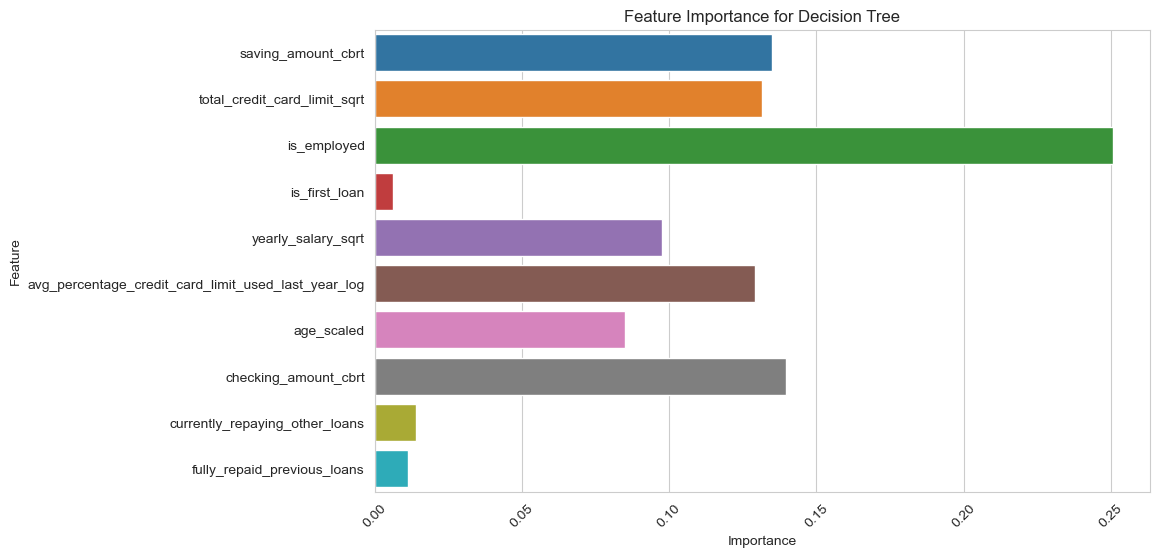

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = merged_df[finalised_columns]
y = merged_df['loan_granted']

# Convert any non-numeric data to numeric (if applicable)
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=tree_clf.feature_importances_, y=X_encoded.columns)
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-success">The feature is_employed is the most important feature for Decision Tree in loan approval classification and selected for fairness evaluation.</div>

<div class="alert alert-warning">Fairness Evaluation - Fairlearn for is_employed</div>

Overall Metrics:
 Accuracy          0.779674
Recall            0.890405
Selection Rate    0.588180
dtype: float64

Metrics by sensitive attribute (is_employed):
             Accuracy    Recall  Selection Rate
is_employed                                    
False        0.874873  0.000000        0.000000
True         0.730391  0.979107        0.892667


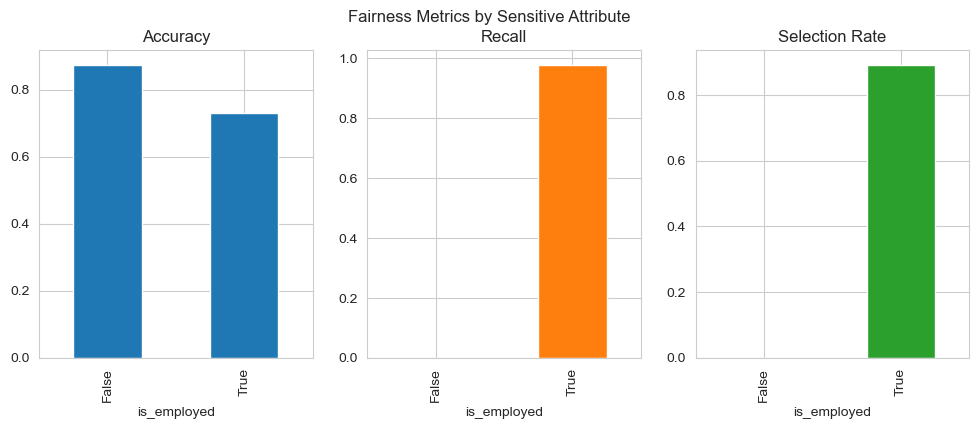

In [177]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference
from sklearn.metrics import accuracy_score, recall_score

# Sensitive feature to check for fairness
sensitive_feature = 'is_employed'  # Sensitive attribute to assess
y_true = y_test  # Actual target values
y_pred = y_pred_tree  # Predictions from your Decision Tree model

# Convert to DataFrame to use sensitive features from X_test
df_test = X_test.copy()
df_test['loan_granted'] = y_true
df_test['predicted_loan_granted'] = y_pred

# Compute fairness metrics using Fairlearn
metric_frame = MetricFrame(
    metrics={"Accuracy": accuracy_score, "Recall": recall_score, "Selection Rate": selection_rate},
    y_true=y_true,
    y_pred=y_pred,
    sensitive_features=df_test[sensitive_feature]
)

# Display metrics
print("Overall Metrics:\n", metric_frame.overall)
print("\nMetrics by sensitive attribute (is_employed):")
print(metric_frame.by_group)

# Plotting differences in metrics
metric_frame.by_group.plot.bar(
    subplots=True, layout=[1, 3], figsize=(12, 4), legend=False, title="Fairness Metrics by Sensitive Attribute"
)
plt.show()


<div class="alert alert-success">The above graph highlights potential fairness issues in the model's predictions based on the is_employed attribute. The accuracy is slightly higher for unemployed individuals, suggesting that the model predicts outcomes more accurately for them, but recall (sensitivity) is higher for employed individuals, indicating that the model more frequently identifies positive outcomes for loan approvals for this group. Additionally, a higher selection rate for employed individuals suggests they are more likely to be granted loans. These disparities imply a potential bias in favor of employed individuals and we should consider to balance recall and selection rates between groups to promote fair outcomes.</div>

<div class="alert alert-warning">Fairness Evaluation - AIF360 for is_employed</div>

In [178]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = merged_df[finalised_columns]
y = merged_df['loan_granted']

# Encode any non-numeric data (if applicable) - assuming 'is_employed' is numeric here
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)

# Create a DataFrame for predictions to align with original dataset structure
X_test = X_test.copy()
X_test['loan_granted'] = y_pred

# Create a BinaryLabelDataset using aif360
dataset = StandardDataset(
    X_test,
    label_name='loan_granted',
    favorable_classes=[1],  # Positive class indicating a favorable outcome
    protected_attribute_names=['is_employed'],  # Sensitive attribute
    privileged_classes=[[1]],  # Privileged class (e.g., employed)
    features_to_drop=[]  # Specify features to drop if necessary
)

# Define privileged and unprivileged groups
privileged_groups = [{'is_employed': 1}]
unprivileged_groups = [{'is_employed': 0}]

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
print("Demographic parity difference:", metric.mean_difference())
print("Disparate impact:", metric.disparate_impact())
print("Statistical parity difference:", metric.statistical_parity_difference())


Demographic parity difference: -0.48894047736930873
Disparate impact: 0.2283636602711087
Statistical parity difference: -0.48894047736930873


<div class="alert alert-success">
The fairness metrics indicate a noticable bias in the loan approval process based on employment status (is_employed). The <font color="black">demographic parity difference of -0.4889</font> suggests that the unprivileged group (individuals who are not employed) is significantly less likely to receive loan approvals compared to the privileged group (employed individuals). Similarly, the <font color="black">disparate impact ratio of 0.2284</font> well below the ideal value of 1, further indicates the unequal treatment, with the unprivileged group having a much lower rate of favorable outcomes. Additionally, the<font color="black"> statistical parity difference -0.4889</font> aligns with these findings, confirming a considerable gap in positive outcomes. These results highlight a prominent bias in favor of the privileged group, suggesting that biasness mitigation steps are needed to ensure equal treatment across different employment statuses in the loan approval process.
</div>

<div class="alert alert-info"><font color='black'><h3>Answer to our Research Questions: </h3></br>
&#10148;Are there inequalities or biasness in the loan approval process?</br>
&nbsp;&nbsp;- Yes, we have identified biasness in the dataset and the model implemented on it.<br><br>
&#10148;What variable may lead to a significant biased loan approval process?</br>
&nbsp;&nbsp;- The variable such as is_employed may lead to biased loan approval. <br><br>
&#10148;What fairness library/methods that may be deployed to identify the probable biasness in the loan approval process?</br>
&nbsp;&nbsp;- Fairness libraries such as Fairlearn and AIF360 may be employed to identify the biasness in the model.<br><br>
&#10148;Which predictive analysis model will provide the best insights in addressing the loan approval process biasness?<br>
&nbsp;&nbsp;- Decision Tree is the best fit predictive analysis model for the loan approval dataset. <br></font>
</div>